<a href="https://colab.research.google.com/github/sofchka/Python_Data_Analysis/blob/main/MiniProject1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MINI PROJECT 1 — DATA COLLECTION & ANALYSIS
# Authors: Sofi Zakaryan & Petros Stepanyan

# **Project Overview**

This Colab notebook presents a mini-project focused on collecting, cleaning, and analyzing phone specifications and prices from online stores. The goal is to create a structured, unified dataset that allows meaningful comparisons between devices and supports informed decision-making for buyers.

---

#Problem Statement

There are many online phone shops and each one shows different prices and various phones with complicated details. Because of this, it is hard for a buyer to compare phones and choose the best option. The information is scattered, not clean, and not easy to analyze.

#Solution Statement

To solve this, we collect phone data from two popular stores and scrape both prices and characteristics, then clean phone data and understand current trends in prices and specifications. By comparing features like screen size, battery, cameras, weight, and brand, we aim to show how phones are priced, which brands dominate the market, and how the two stores differ in affordability.

---

# **Tools and Technologies Used**

**requests**
Used to fetch HTML content from the websites during scraping.

**BeautifulSoup (bs4)**
Parses and extracts relevant information (names, prices, specs) from HTML pages.

**csv**
Writes scraped data to CSV files.

**pandas**
Central to all data processing tasks, including:

* Reading and writing CSV files
* Cleaning and transforming data
* Merging datasets
* Creating new features
* Computing statistical summaries

**re (Regular Expressions)**
Used to standardize phone names and extract numeric values from text.

**numpy**
Supports numerical operations and NaN handling.

**matplotlib.pyplot**
Provides foundational plotting capabilities for histograms, scatter plots, and boxplots.

**seaborn**
High-level statistical visualization library used for:

* Heatmaps
* KDE plots
* Boxplots
* Scatter plots

**scipy.stats**
Performs statistical hypothesis tests, including:

* `ttest_ind`
* `f_oneway` (ANOVA)

**google.colab.drive**
Mounts Google Drive for saving and loading scraped data and cleaned datasets.

---







## Stage 1 - Data Scraping

Collect raw data from websites using tools like BeautifulSoup. This step gathers all phone information and prices from the chosen online stores into "yerevanmobile_specs.csv" and "mobilecentre_phones.csv".

* Also Save in drive, give access to collaborate and have easier access.


In [ ]:
import requests
import csv
from bs4 import BeautifulSoup

# Define headers for web requests
HEADERS = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64)"
}

# Function to get parsed HTML content from a URL
def get_soup(url):
    resp = requests.get(url, headers=HEADERS, timeout=30)
    resp.raise_for_status()
    return BeautifulSoup(resp.text, "html.parser")

### For Yerevan Mobile - Store 1

This script scrapes phone information from YerevanMobile and saves it into a CSV file.

1. Sets the base URL and output CSV filename.

2. Defines extract_specs()

    * Opens each product page (linked pages)
  
    * Finds specifications like Brand, Year, Screen Type, Camera, Battery, Weight

3. Returns them in a dictionary

4. Creates the CSV file and writes the header row.

5. Loops through 7 pages of the YerevanMobile phones section.

    * For each page:

         * Downloads the page (get_soup)

         * Finds all products

         * Extracts name, price, and product link

    * For each product:

         * Calls extract_specs(link)

         * Prints the scraped item

         * Writes all phone data (name, price, specs) into the CSV file

* Prints “DONE” when finished.

In [ ]:
import csv

# URL for the first store and CSV filename
URL_MAIN = "https://www.yerevanmobile.am/am/electronics/phones.html?p="
csv_filename = "yerevanmobile_specs.csv"

# Function to extract phone specifications from a product page
def extract_specs(product_url: str) -> dict:

    soup = get_soup(product_url)

    specs = {
        "Brand": "", "Year": "", "ScreenType": "", "ScreenInch": "",
        "MainCamera": "", "FrontCamera": "", "Battery": "", "Weight": ""
    }

    # Loop through detail blocks to find specific specs
    for block in soup.find_all("div", class_="details_block"):
        for tr in block.find_all("tr"):
            tds = tr.find_all("td")
            if len(tds) != 2: continue

            key = tds[0].get_text(strip=True)
            val = tds[1].get_text(strip=True)

            # Assign extracted values to specs dictionary
            if "Ապրանքանիշ" in key: specs["Brand"] = val
            elif "Հայտարարության Տարին" in key: specs["Year"] = val
            elif "Էկրանի չափ" in key: specs["ScreenInch"] = val
            elif "Էկրանի տեսակ" in key: specs["ScreenType"] = val
            elif "Հիմնական տեսախցիկ" in key: specs["MainCamera"] = val
            elif "Դիմային տեսախցիկ" in key: specs["FrontCamera"] = val
            elif "Մարտկոցի հզորություն" in key: specs["Battery"] = val
            elif key.strip() == "Քաշ": specs["Weight"] = val

    return specs

# Open CSV to write headers
with open(csv_filename, "w", newline="", encoding="utf-8") as f:
    writer = csv.writer(f)
    writer.writerow([
        "Name", "Price", "Brand", "Year",
        "ScreenType", "ScreenInch", "MainCamera", "FrontCamera",
        "Battery", "Weight"
    ])

# Scrape data from multiple pages
for page_num in range(7):
    list_url = URL_MAIN + str(page_num)
    list_soup = get_soup(list_url)

    products = list_soup.find_all("div", class_="product-item-info combo_hover")
    print(f"Page {page_num}: found {len(products)} products")

    # Extract details for each product and write to CSV
    for prod in products:
        name_tag = prod.find("a", class_="product-item-link")
        if not name_tag: continue

        name = name_tag.get_text(strip=True)
        link = name_tag.get("href", "")

        price_tag = prod.find("span", class_="price")
        price = price_tag.get_text(strip=True) if price_tag else ""

        specs = extract_specs(link)

        print(f"✔ {name} | {price}") # Print checkmark for scraped item

        with open(csv_filename, "a", newline="", encoding="utf-8") as f:
            writer = csv.writer(f)
            writer.writerow([
                name,
                price,
                specs["Brand"],
                specs["Year"],
                specs["ScreenType"],
                specs["ScreenInch"],
                specs["MainCamera"],
                specs["FrontCamera"],
                specs["Battery"],
                specs["Weight"],
            ])

print("\nDONE. CSV saved for first URL:", csv_filename)

Page 0: found 12 products
✔ Xiaomi Redmi A5 | ֏ 29 000
✔ Samsung Galaxy A06 | ֏ 35 000
✔ Samsung Galaxy A07 4G | ֏ 42 000
✔ Xiaomi Redmi 15C 4G | ֏ 49 000
✔ Samsung Galaxy A16 | ֏ 53 000
✔ Xiaomi Poco C85 4G | ֏ 57 000
✔ Xiaomi Redmi 15 4G | ֏ 57 000
✔ Xiaomi Poco M7 | ֏ 63 000
✔ Xiaomi Redmi Note 14 4G | ֏ 63 000
✔ Samsung Galaxy A17 | ֏ 65 000
✔ Samsung Galaxy A26 | ֏ 79 000
✔ Xiaomi Redmi Note 14S | ֏ 83 000
Page 1: found 12 products
✔ Xiaomi Redmi A5 | ֏ 29 000
✔ Samsung Galaxy A06 | ֏ 35 000
✔ Samsung Galaxy A07 4G | ֏ 42 000
✔ Xiaomi Redmi 15C 4G | ֏ 49 000
✔ Samsung Galaxy A16 | ֏ 53 000
✔ Xiaomi Redmi 15 4G | ֏ 57 000
✔ Xiaomi Poco C85 4G | ֏ 57 000
✔ Xiaomi Poco M7 | ֏ 63 000
✔ Xiaomi Redmi Note 14 4G | ֏ 63 000
✔ Samsung Galaxy A17 | ֏ 65 000
✔ Samsung Galaxy A26 | ֏ 79 000
✔ Xiaomi Redmi Note 14S | ֏ 83 000
Page 2: found 12 products
✔ Xiaomi Redmi Note 14 Pro 4G | ֏ 93 000
✔ Samsung Galaxy A36 | ֏ 105 000
✔ Honor X8c | ֏ 109 000
✔ Samsung Galaxy A56 | ֏ 126 000
✔ Xiaomi Poco

### For Mobile Centre - Store 2

This script scrapes phone data from MobileCentre.am and saves it into a CSV file.

It loads the main page, finds each product, extracts the phone's brand, name, and price, prints the results, and writes everything into mobilecentre_phones.csv.

In [ ]:
# URL for the second store and CSV filename
URL = "https://www.mobilecentre.am/category/phones/138/0/"
csv_file = "mobilecentre_phones.csv"

# Get page content and find product listings
soup = get_soup(URL)
products = soup.find_all("div", class_="listitem")

# Open CSV to write headers
with open(csv_file, "w", newline="", encoding="utf-8") as f:
    writer = csv.writer(f)
    writer.writerow(["Brand", "Name", "Price"])

count = 0
# Extract name, brand, and price for each product
for p in products:

    name_tag = p.find("h3")
    name = name_tag.get_text(strip=True) if name_tag else ""

    brand = name.split()[0] if name else "" # Brand is the first word of the name

    price_tag = p.find("div", class_="price")
    price = price_tag.get_text(strip=True) if price_tag else ""

    print(f"✔ {name} | {price}") # Log scraped item

    # Write extracted data to CSV
    with open(csv_file, "a", newline="", encoding="utf-8") as f:
        writer = csv.writer(f)
        writer.writerow([brand, name, price])

    count += 1


print(f"\nDONE for second URL! Saved {count} products → {csv_file}")

✔ iPhone 17 Pro Max 2TB Dual eSIM (Deep Blue) | 1,038,900դր.
✔ iPhone 17 Pro Max 2TB Dual eSIM (Cosmic Orange) | 1,038,900դր.
✔ Apple iPhone 17 Pro Max 256GB | 598,900դր.
✔ Apple iPhone 17 Pro | 518,900դր.
✔ Xiaomi Poco X7 Pro | 145,900դր.
✔ Apple iPhone 16 | 318,900դր.
✔ Apple iPhone 15 | 268,900դր.
✔ Apple iPhone 13 | 199,900դր.
✔ Apple iPhone Air | 418,900դր.
✔ Xiaomi Redmi Note 14S | 89,900դր.
✔ Xiaomi Poco M7 Pro | 87,900դր.
✔ Xiaomi Poco F7 Pro | 215,900դր.
✔ Xiaomi Poco F7 | 176,900դր.
✔ Xiaomi 15T Pro | 259,900դր.
✔ Xiaomi 15T | 178,900դր.
✔ Realme 15T | 110,900դր.
✔ Realme 15 Pro | 195,900դր.
✔ Xiaomi Redmi Note 14 Pro | 122,900դր.
✔ Xiaomi Redmi A5 | 29,900դր.
✔ Xiaomi Redmi 15C | 49,900դր.
✔ Xiaomi Redmi 15 | 57,900դր.
✔ Xiaomi Poco X7 | 113,900դր.
✔ Xiaomi Poco M7 | 55,900դր.
✔ Xiaomi Poco C85 | 48,900դր.
✔ Realme Note 70 | 39,900դր.
✔ Samsung Galaxy A17 | 73,900դր.
✔ Samsung Galaxy S25 FE | 237,900դր.
✔ Xiaomi Poco C71 | 28,900դր.
✔ Samsung Galaxy S25 | 278,900դր.
✔ Samsun

### Drive Saving

This code mounts Google Drive in Colab and copies the two scraped CSV files into a project folder in Drive.

It checks if each local CSV exists, and if so, moves it into **MyDrive/data_analysis_project**.

If a file is missing, it prints an error message.

In [ ]:
from google.colab import drive
import shutil
import os

# Mount Drive
drive.mount('/content/drive')

# Folder in Drive
drive_folder = "/content/drive/MyDrive/data_analysis_project/"
os.makedirs(drive_folder, exist_ok=True)

# Files to copy
files = [
    ("yerevanmobile_specs.csv", drive_folder + "yerevanmobile_specs.csv"),
    ("mobilecentre_phones.csv", drive_folder + "mobilecentre_phones.csv")
]

# Copy each file if it exists
for local, dest in files:
    if os.path.exists(local):
        shutil.copy(local, dest)
        print(f"Copied {local} → {dest}")
    else:
        print(f"ERROR. {local} not found. Scraping incomplete.")


Mounted at /content/drive
Copied yerevanmobile_specs.csv → /content/drive/MyDrive/data_analysis_project/yerevanmobile_specs.csv
Copied mobilecentre_phones.csv → /content/drive/MyDrive/data_analysis_project/mobilecentre_phones.csv


## Stage 2 - Data Cleaning

Load the **'yerevanmobile_specs_cleaned.csv'** and **'mobilecentre_phones_cleaned.csv'** files from Drive into pandas DataFrames, and then standardize all the columns.
* Fix missing values, remove duplicates, detect outliers, and correct inconsistent formats.
* Make the raw scraped data usable for further analysis.


### Loading from Drive

It loads the two CSV files from Google Drive, shows the first rows so you can see the data, and then checks each column in the first dataset to count how many missing values there are.

In [ ]:
import pandas as pd

# Your shared links (already set to "Anyone with link → Viewer")
specs_share_url  = "https://drive.google.com/file/d/1Z_CFf8TYHMKu3antUsdKG4vzavS_Wfjy/view?usp=drive_link"
prices_share_url = "https://drive.google.com/file/d/181ZI0jEYSesqxBW4qNLCRk_JXBOIM1L0/view?usp=drive_link"

# Convert shared links → direct download URLs
def convert_to_direct(url):
    file_id = url.split("/")[-2]
    return f"https://drive.google.com/uc?export=download&id={file_id}"

specs_url  = convert_to_direct(specs_share_url)
prices_url = convert_to_direct(prices_share_url)

# Load the CSV files from the direct links
df_specs  = pd.read_csv(specs_url)
df_prices = pd.read_csv(prices_url)

# Preview the loaded data
print("Preview of Full Data from Store 1 (Yerevan Mobile):")
display(df_specs.head())

print("\nPreview of Price Data from Store 2 (Mobile Centre):")
display(df_prices.head())

# Missing Value Check (same as your original logic)
all_columns = [
    "Name", "Price", "Brand", "Year",
    "ScreenType", "ScreenInch", "MainCamera", "FrontCamera",
    "Battery", "Weight"
]

print("\n=====================================================")
print("Checking each column for missing data:\n")

for column_name in all_columns:

    nan_count = df_specs[column_name].isnull().sum()

    empty_string_count = 0
    if df_specs[column_name].dtype == "object":
        empty_string_count = (df_specs[column_name] == "").sum()

    total_missing = nan_count + empty_string_count
    percent_missing = (total_missing / len(df_specs)) * 100

    if total_missing > 0:
        print(f"{column_name}: {total_missing} missing ({percent_missing:.1f}%)")


Preview of Full Data from Store 1 (Yerevan Mobile):


,Name,Price,Brand,Year,ScreenType,ScreenInch,MainCamera,FrontCamera,Battery,Weight
0,Xiaomi Redmi A5,֏ 29 000,Xiaomi,2025.0,"IPS LCD, 120Hz, 450 nits (typ)",6.88 inch,NaN,8MP,5200 mAh,NaN
1,Samsung Galaxy A06,֏ 35 000,Samsung,2024.0,IPS LCD,6.7 inch,50MP+2MP,8MP,5000 mAh,189g
2,Samsung Galaxy A07 4G,֏ 42 000,Samsung,2025.0,PLS LCD,6.7 inch,50MP+2MP,8MP,5000 mAh,NaN
3,Xiaomi Redmi 15C 4G,֏ 49 000,Xiaomi,2025.0,IPS LCD,6.9 inch,50MP,8MP,6000 mAh,205g
4,Samsung Galaxy A16,֏ 53 000,Samsung,2024.0,Super AMOLED,6.7 inch,50MP+5MP+2MP,13MP,5000 mAh,NaN



Preview of Price Data from Store 2 (Mobile Centre):


,Brand,Name,Price
0,iPhone,iPhone 17 Pro Max 2TB Dual eSIM (Deep Blue),"1,038,900դր."
1,iPhone,iPhone 17 Pro Max 2TB Dual eSIM (Cosmic Orange),"1,038,900դր."
2,Apple,Apple iPhone 17 Pro Max 256GB,"598,900դր."
3,Apple,Apple iPhone 17 Pro,"518,900դր."
4,Xiaomi,Xiaomi Poco X7 Pro,"145,900դր."



Checking each column for missing data:

Price: 7 missing (8.8%)
Brand: 2 missing (2.5%)
Year: 2 missing (2.5%)
MainCamera: 2 missing (2.5%)
FrontCamera: 2 missing (2.5%)
Battery: 7 missing (8.8%)
Weight: 33 missing (41.2%)


### Store 1 Cleaning

This code cleans the phone specifications DataFrame step by step:


1. **ScreenType cleanup**:
     
     Takes only the part before a comma, removing extra details and spaces.



2. **Brand extraction**:  
     
     Gets the brand by taking the first word of the phone's name.



3. **Price cleaning**:  
     
     Removes the currency symbol (֏), spaces, and trims the text so only the numeric price remains.



4. **Reorder columns**:
     
     Moves the Brand column to the front for better organization.



5. **ScreenInch cleanup**:  
     
     Removes the word “inch” so only the numeric size stays.



6. **Normalize missing values**:  
     
     Replaces different versions of NaN or empty strings with a simple “-”.



7. **Battery cleanup**:  
     
     Removes “mAh” so only the battery number remains.



8. **Weight cleanup**:  
     
     Removes “g” so the weight becomes just a number.



9. **Year cleanup**:  
     
     Converts values like “2025.0” into “2025” and replaces missing years with “-”.



10. **Save cleaned data**:  
     
     Writes the cleaned DataFrame to a new CSV file.

In [ ]:
# Clean 'ScreenType': Keep only the first part before a comma
df_specs["ScreenType"] = df_specs["ScreenType"].astype(str).apply(
    lambda x: x.split(",")[0].strip()
)

# Extract 'Brand' as the first word from 'Name'
df_specs["Brand"] = df_specs["Name"].apply(lambda x: x.split()[0] if isinstance(x, str) and len(x.split()) > 0 else "-")

# Clean 'Price': Remove currency symbol and spaces
df_specs["Price"] = (
    df_specs["Price"]
    .astype(str)
    .str.replace("֏", "", regex=False)
    .str.replace(" ", "", regex=False)
    .str.strip()
)

# Reorder columns to place 'Brand' first
cols = list(df_specs.columns)
cols.remove("Brand")
df_specs = df_specs[["Brand"] + cols]

# Clean 'ScreenInch': Remove "inch" unit
df_specs["ScreenInch"] = (
    df_specs["ScreenInch"]
    .astype(str)
    .str.replace("inch", "", regex=False)
    .str.strip()
)

# Clean 'Battery': Remove "mAh" unit
df_specs["Battery"] = (
    df_specs["Battery"]
    .astype(str)
    .str.replace("mAh", "", regex=False)
    .str.strip()
)

# Clean 'Weight': Remove "g" unit
df_specs["Weight"] = (
    df_specs["Weight"]
    .astype(str)
    .str.replace("g", "", regex=False)
    .str.strip()
)

# Clean 'Year': Convert floats like 2025.0 to 2025; handle missing years
def clean_year(x):
    if pd.isna(x) or str(x).lower() in ["nan", ""]:
        return "-" # Use np.nan for missing years
    x = str(x)
    if x.endswith(".0"):
        return x.replace(".0", "")
    return x

df_specs["Year"] = df_specs["Year"].apply(clean_year)

# Replace various forms of missing values and empty strings with "-"
df_specs = df_specs.replace(["Nan", "nan", "NaN", ""], "-")

# Set specific columns to object type for consistent handling
cols_to_text = ["ScreenType", "ScreenInch", "MainCamera", "FrontCamera", "Battery", "Weight"]
df_specs[cols_to_text] = df_specs[cols_to_text].astype("object")

# Opt-in to future pandas behavior to suppress warnings and fill missing values
pd.set_option('future.no_silent_downcasting', True)
df_specs[cols_to_text] = df_specs[cols_to_text].fillna("-").infer_objects(copy=False)

# Save the cleaned DataFrame to a new CSV file
df_specs.to_csv("yerevanmobile_specs_cleaned.csv", index=False)

print("Cleaning complete. Saved to yerevanmobile_specs_cleaned.csv")

Cleaning complete. Saved to yerevanmobile_specs_cleaned.csv


### Store 2 Cleaning

This code cleans the price dataset from MobileCentre:

1. Price cleanup:  
Removes Armenian currency symbols (“դր”, “դ”), commas, and spaces so only the number remains.

2. Fix formatting:  
Converts the price to string, removes trailing “.0” or a final dot so the value is clean.

3. Convert price to integer:  
Turns the cleaned price text into an actual integer value.

4. Brand extraction:  
Takes the first word from the phone name and uses it as the brand.

5. Reorder columns:  
Keeps the table neat by putting columns in the order: Brand → Name → Price.

6. Handle missing values:  
Replaces any leftover NaN with “-”.

7. Save cleaned dataset:  
Writes the final cleaned DataFrame into a new CSV file.

In [ ]:
# Clean 'Price': Remove currency, commas, spaces; convert to integer
df_prices["Price"] = (
    df_prices["Price"]
    .astype(str)
    .str.replace("դր", "", regex=False)
    .str.replace("դ", "", regex=False)
    .str.replace(",", "", regex=False)
    .str.replace(" ", "", regex=False)
    .str.strip()
)

# Ensure price is string for cleaning, then remove trailing '.0' or '.'
df_prices["Price"] = df_prices["Price"].astype(str)
df_prices["Price"] = df_prices["Price"].str.replace(r"\.0$", "", regex=True)
df_prices["Price"] = df_prices["Price"].str.replace(r"\.$", "", regex=True)

# Convert cleaned price to integer type
df_prices["Price"] = df_prices["Price"].astype(int)

# Extract 'Brand' as the first word from 'Name'
df_prices["Brand"] = df_prices["Name"].apply(lambda x: x.split()[0] if isinstance(x, str) and len(x.split()) > 0 else "-")

# Reorder columns to 'Brand', 'Name', 'Price'
df_prices = df_prices[["Brand", "Name", "Price"]]

# Replace any remaining NaN values with "-"
df_prices = df_prices.fillna("-")

# Save the cleaned DataFrame to a new CSV file
df_prices.to_csv("mobilecentre_phones_cleaned.csv", index=False)

print("Cleaning done → mobilecentre_phones_cleaned.csv")

Cleaning done → mobilecentre_phones_cleaned.csv


### Finalizing and Checking Progress

This code loads both the raw CSVs and the cleaned CSVs so you can compare them.

It sets certain specification columns to text type, fills missing values correctly using pandas' future-safe settings, and then shows the first rows of each dataset to highlight differences.

* Finally, it prints how many missing values are left in each cleaned dataframe.

In [ ]:
import pandas as pd

specs_share_url  = "https://drive.google.com/file/d/1Z_CFf8TYHMKu3antUsdKG4vzavS_Wfjy/view?usp=drive_link"
prices_share_url = "https://drive.google.com/file/d/181ZI0jEYSesqxBW4qNLCRk_JXBOIM1L0/view?usp=drive_link"

# Convert shared links to direct download URLs
def convert_to_direct(url):
    file_id = url.split("/")[-2]
    return f"https://drive.google.com/uc?export=download&id={file_id}"

specs_url  = convert_to_direct(specs_share_url)
prices_url = convert_to_direct(prices_share_url)

# Load NON-CLEANED datasets from Drive share links
df_specs_non  = pd.read_csv(specs_url)
df_prices_non = pd.read_csv(prices_url)

# Load CLEANED datasets
df_specs = pd.read_csv("yerevanmobile_specs_cleaned.csv")
df_prices = pd.read_csv("mobilecentre_phones_cleaned.csv")

# Display previews of all dataframes
print("\n\nPreview of Full Data In Store 1 NON CLEANED:")
display(df_specs_non.head())

print("\n\nPreview of Full Data In Store 1 CLEANED:")
display(df_specs.head())

print("\n\nPreview of Full Data In Store 2 NON CLEANED:")
display(df_prices_non.head())

print("\n\nPreview of Full Data In Store 2 CLEANED:")
display(df_prices.head())

# Check and display null values for cleaned dataframes
print("\n\nChecking Nulls.")
print("\nMissing Values per Column Store 1:")
display(df_specs.isnull().sum())
print("\n\nMissing Values per Column Store 2:")
display(df_prices.isnull().sum())



Preview of Full Data In Store 1 NON CLEANED:


,Name,Price,Brand,Year,ScreenType,ScreenInch,MainCamera,FrontCamera,Battery,Weight
0,Xiaomi Redmi A5,֏ 29 000,Xiaomi,2025.0,"IPS LCD, 120Hz, 450 nits (typ)",6.88 inch,NaN,8MP,5200 mAh,NaN
1,Samsung Galaxy A06,֏ 35 000,Samsung,2024.0,IPS LCD,6.7 inch,50MP+2MP,8MP,5000 mAh,189g
2,Samsung Galaxy A07 4G,֏ 42 000,Samsung,2025.0,PLS LCD,6.7 inch,50MP+2MP,8MP,5000 mAh,NaN
3,Xiaomi Redmi 15C 4G,֏ 49 000,Xiaomi,2025.0,IPS LCD,6.9 inch,50MP,8MP,6000 mAh,205g
4,Samsung Galaxy A16,֏ 53 000,Samsung,2024.0,Super AMOLED,6.7 inch,50MP+5MP+2MP,13MP,5000 mAh,NaN




Preview of Full Data In Store 1 CLEANED:


,Brand,Name,Price,Year,ScreenType,ScreenInch,MainCamera,FrontCamera,Battery,Weight
0,Xiaomi,Xiaomi Redmi A5,29000,2025,IPS LCD,6.88,-,8MP,5200,-
1,Samsung,Samsung Galaxy A06,35000,2024,IPS LCD,6.70,50MP+2MP,8MP,5000,189
2,Samsung,Samsung Galaxy A07 4G,42000,2025,PLS LCD,6.70,50MP+2MP,8MP,5000,-
3,Xiaomi,Xiaomi Redmi 15C 4G,49000,2025,IPS LCD,6.90,50MP,8MP,6000,205
4,Samsung,Samsung Galaxy A16,53000,2024,Super AMOLED,6.70,50MP+5MP+2MP,13MP,5000,-




Preview of Full Data In Store 2 NON CLEANED:


,Brand,Name,Price
0,iPhone,iPhone 17 Pro Max 2TB Dual eSIM (Deep Blue),"1,038,900դր."
1,iPhone,iPhone 17 Pro Max 2TB Dual eSIM (Cosmic Orange),"1,038,900դր."
2,Apple,Apple iPhone 17 Pro Max 256GB,"598,900դր."
3,Apple,Apple iPhone 17 Pro,"518,900դր."
4,Xiaomi,Xiaomi Poco X7 Pro,"145,900դր."




Preview of Full Data In Store 2 CLEANED:


,Brand,Name,Price
0,iPhone,iPhone 17 Pro Max 2TB Dual eSIM (Deep Blue),1038900
1,iPhone,iPhone 17 Pro Max 2TB Dual eSIM (Cosmic Orange),1038900
2,Apple,Apple iPhone 17 Pro Max 256GB,598900
3,Apple,Apple iPhone 17 Pro,518900
4,Xiaomi,Xiaomi Poco X7 Pro,145900




Checking Nulls.

Missing Values per Column Store 1:


,0
Brand,0
Name,0
Price,0
Year,0
ScreenType,0
ScreenInch,0
MainCamera,0
FrontCamera,0
Battery,0
Weight,0




Missing Values per Column Store 2:


,0
Brand,0
Name,0
Price,0


## Stage 3 - Data Preprocessing

1. Data Preprocessing

Prepare the data for EDA by transforming it:

Create new features

Convert categorical text to usable formats

Normalize or scale columns if needed

2. Text Preprocessing

Clean textual fields by removing stopwords, tokenizing, standardizing names, and fixing inconsistent labels.


### Data Transformation: Normalization

This code reloads the cleaned files and standardizes phone names by removing extra details. It converts each name to lowercase, then uses a combined regex to strip out storage sizes, network types, **SIM** info, colors, and descriptive words. After cleaning, it applies the function to both DataFrames and prints the updated name column.

In [ ]:
import re

# Reload cleaned dataframes for consistent state
df_specs = pd.read_csv("yerevanmobile_specs_cleaned.csv")
df_prices = pd.read_csv("mobilecentre_phones_cleaned.csv")

# Function to standardize phone names by removing variations
def standardize_name(name):
    if not isinstance(name, str): return name
    name = name.lower() # Convert to lowercase

    # Patterns for various details to remove from phone names
    patterns = [
        r"\b\d+\s*gb\b", r"\b\d+\s*tb\b", # Storage sizes
        r"\d+g\b", # Network types (e.g., 5G)
        r"nano-sim", r"esim", r"wifi", r"wi-fi", r"dual sim", # Connectivity
        r"gb", r"tb", # Generic storage units
        r"silver", r"gold", r"green", r"red", r"purple", r"orange", r"yellow", r"gray",
        r"titanium", r"cosmic", r"deep", r"light", r"mint", r"awesome", r"starlight",
        r"midnight", r"amber", r"coral", r"sky", r"ocean", r"sunrise", r"jetblack",
        r"phantom", r"navy", r"marble", r"cobalt", r"emerald", r"alpine", r"meadow",
        r"stardust", r"moonlight", r"twilight", r"aurora", r"ocean", r"lake", r"sandy",
        r"dreamy", r"starry", r"sage", r"charcoal", r"violet", r"cyan", r"teal",
        r"ultramarine", r"titan", r"fluid", r"razor", r"pioneer", r"navigator",
        r"woodland", r"sunny", r"rock", r"champion", r"opaque", r"phantom", r"electric",
        r"metallic", r"aqua", r"graphite", r"lava", r"glory", r"dark",
        r"white", r"black", r"blue", r"pink", r"brown", r"grey", # Colors
        r"\((.*?)\)", # Text in parentheses
        r"-", r"\s+" # Hyphens and extra spaces
    ]

    # Combine patterns and apply substitution
    combined_pattern = re.compile('|'.join(patterns))
    name = combined_pattern.sub(" ", name)
    name = re.sub(r'\s+', ' ', name).strip() # Normalize whitespace
    return name

# Apply name standardization to both DataFrames
df_specs["Name"] = df_specs["Name"].apply(standardize_name)
df_prices["Name"] = df_prices["Name"].apply(standardize_name)

# Display standardized names
print("Standardized 'Name' column for df_specs (first 5 rows):")
display(df_specs[['Name']].head())
print("\nStandardized 'Name' column for df_prices (first 5 rows):")
display(df_prices[['Name']].head())

Standardized 'Name' column for df_specs (first 5 rows):


,Name
0,xiaomi mi a5
1,samsung galaxy a06
2,samsung galaxy a07
3,xiaomi mi 15c
4,samsung galaxy a16



Standardized 'Name' column for df_prices (first 5 rows):


,Name
0,iphone 17 pro max dual
1,iphone 17 pro max dual
2,apple iphone 17 pro max
3,apple iphone 17 pro
4,xiaomi poco x7 pro


### Standardization and Data Integration

This code first removes duplicate phone entries from the second store's dataset by keeping only the first record with the same Name and Price. After that, it merges the cleaned price dataset with the cleaned specifications dataset using the standardized Name column. Only phones that appear in both stores are kept (inner join). Finally, it shows how many rows and columns the merged dataset contains and prints the first few merged entries.

In [ ]:
# Remove duplicate phone entries from df_prices
print("Before duplicate removal:", df_prices.shape[0])
df_prices_clean = df_prices.drop_duplicates(subset=["Name", "Price"], keep="first")
print("After duplicate removal:", df_prices_clean.shape[0])

# Merge df_specs and df_prices_clean on standardized 'Name'
df_merged = pd.merge(
    df_specs,
    df_prices_clean,
    on="Name",
    how="inner",
    suffixes=("_store1", "_store2")
)

# Display merge summary and head of merged DataFrame
print("\nMERGE COMPLETE")
print("Merged rows:", df_merged.shape[0])
print("Merged columns:", df_merged.shape[1])
display(df_merged.head())

Before duplicate removal: 156
After duplicate removal: 145

MERGE COMPLETE
Merged rows: 53
Merged columns: 12


,Brand_store1,Name,Price_store1,Year,ScreenType,ScreenInch,MainCamera,FrontCamera,Battery,Weight,Brand_store2,Price_store2
0,Xiaomi,xiaomi mi a5,29000,2025,IPS LCD,6.88,-,8MP,5200,-,Xiaomi,29900
1,Samsung,samsung galaxy a06,35000,2024,IPS LCD,6.70,50MP+2MP,8MP,5000,189,Samsung,35900
2,Samsung,samsung galaxy a07,42000,2025,PLS LCD,6.70,50MP+2MP,8MP,5000,-,Samsung,42900
3,Xiaomi,xiaomi mi 15c,49000,2025,IPS LCD,6.90,50MP,8MP,6000,205,Xiaomi,49900
4,Samsung,samsung galaxy a16,53000,2024,Super AMOLED,6.70,50MP+5MP+2MP,13MP,5000,-,Samsung,66900


### Handle Data Types and Missing Values

This code converts important columns in the merged dataset into numeric values, fills missing camera info with “-”, and then shows the updated DataFrame structure before and after the changes.

In [ ]:
df_merged.info()

# Convert price, year, screen inch, battery, and weight columns to numeric
df_merged['Price_store1'] = pd.to_numeric(df_merged['Price_store1'], errors='coerce')
df_merged['Price_store2'] = pd.to_numeric(df_merged['Price_store2'], errors='coerce')
df_merged['Year']         = pd.to_numeric(df_merged['Year'], errors='coerce')
df_merged['ScreenInch']   = pd.to_numeric(df_merged['ScreenInch'], errors='coerce')
df_merged['Battery']      = pd.to_numeric(df_merged['Battery'], errors='coerce')
df_merged['Weight']       = pd.to_numeric(df_merged['Weight'], errors='coerce')

# Fill any NaN in camera columns with "-"
df_merged['MainCamera']  = df_merged['MainCamera'].fillna("-")
df_merged['FrontCamera'] = df_merged['FrontCamera'].fillna("-")

print("\n\nNumeric columns converted and camera columns filled.")
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53 entries, 0 to 52
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Brand_store1  53 non-null     object 
 1   Name          53 non-null     object 
 2   Price_store1  53 non-null     object 
 3   Year          53 non-null     object 
 4   ScreenType    53 non-null     object 
 5   ScreenInch    53 non-null     float64
 6   MainCamera    53 non-null     object 
 7   FrontCamera   53 non-null     object 
 8   Battery       53 non-null     object 
 9   Weight        53 non-null     object 
 10  Brand_store2  53 non-null     object 
 11  Price_store2  53 non-null     int64  
dtypes: float64(1), int64(1), object(10)
memory usage: 5.1+ KB


Numeric columns converted and camera columns filled.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53 entries, 0 to 52
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        ------------

In [ ]:
# Fill missing numeric values with their column means
for col in ['ScreenInch', 'Battery', 'Weight']:
    if col in df_merged.columns:
        mean_val = df_merged[col].mean()
        df_merged[col] = df_merged[col].fillna(mean_val)

print("Filled NaN in 'ScreenInch', 'Battery', 'Weight' columns with their means.")

Filled NaN in 'ScreenInch', 'Battery', 'Weight' columns with their means.


In [ ]:
df_merged.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53 entries, 0 to 52
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Brand_store1  53 non-null     object 
 1   Name          53 non-null     object 
 2   Price_store1  51 non-null     float64
 3   Year          52 non-null     float64
 4   ScreenType    53 non-null     object 
 5   ScreenInch    53 non-null     float64
 6   MainCamera    53 non-null     object 
 7   FrontCamera   53 non-null     object 
 8   Battery       53 non-null     float64
 9   Weight        53 non-null     float64
 10  Brand_store2  53 non-null     object 
 11  Price_store2  53 non-null     int64  
dtypes: float64(5), int64(1), object(6)
memory usage: 5.1+ KB


### Feature Engineering

This code fills missing phone years using the median value and then calculates each phone's age by subtracting the release year from 2025. It also creates 3 new features:

* **BatteryPerGram** - which shows how efficient a phone's battery is relative to its weight

* **PriceCategory** - which labels each phone as low, medium, or high price based on its Store 2 price

* **MainCamera2** & **FrontCamera2** - numeric values to easier compare them.

After creating these features, it displays the updated dataset and prints the new DataFrame structure.

In [ ]:
# Fill missing 'Year' values with the median year
median_year = df_merged['Year'].median()
df_merged['Year'] = df_merged['Year'].fillna(median_year)
print(f"Filled missing 'Year' values with median: {median_year}")

# Calculate 'PhoneAge' from the 'Year'
latest_year = 2025
df_merged['PhoneAge'] = latest_year - df_merged['Year']

# Create 'BatteryPerGram' feature
df_merged['BatteryPerGram'] = df_merged['Battery'] / df_merged['Weight']

# Create 'MainCamera2' and 'FrontCamera2' features by extracting main MP value
def extract_main_megapixel(camera_str):
    if not isinstance(camera_str, str) or camera_str == '-':
        return None
    match = re.match(r'(\d+)(?:MP)?', camera_str.strip())
    if match:
        return int(match.group(1))
    return None

df_merged['MainCamera2'] = df_merged['MainCamera'].apply(extract_main_megapixel)
df_merged['FrontCamera2'] = df_merged['FrontCamera'].apply(extract_main_megapixel)

# Create 'PriceCategory' feature
df_merged['Price_store2'] = pd.to_numeric(df_merged['Price_store2'], errors='coerce')
df_merged.dropna(subset=['Price_store2'], inplace=True) # Drop rows with NaN price for categorization

def price_category(row):
    price = row["Price_store2"]
    if price < 100000: return "low"
    elif 100000 <= price <= 250000: return "medium"
    else: return "high"

df_merged["PriceCategory"] = df_merged.apply(price_category, axis=1)

# Display preview and info of DataFrame with new features
print("\nPreview of Merged DataFrame with new features:")
display(df_merged.tail())
print("\nDataFrame Info after feature engineering:")
df_merged.info()

Filled missing 'Year' values with median: 2025.0

Preview of Merged DataFrame with new features:


,Brand_store1,Name,Price_store1,Year,ScreenType,ScreenInch,MainCamera,FrontCamera,Battery,Weight,Brand_store2,Price_store2,PhoneAge,BatteryPerGram,MainCamera2,FrontCamera2,PriceCategory
48,Apple,apple iphone 16 pro max,499000.0,2024.0,LTPO Super Retina XDR OLED,6.90,48MP+12MP+48MP,12MP,5195.0625,189.592593,Apple,519900,1.0,27.401189,48.0,12.0,high
49,Apple,apple iphone 17 pro,509000.0,2025.0,LTPO Super Retina XDR OLED,6.30,48MP + 48MP + 48MP,18 MP,3988.0000,189.592593,Apple,518900,0.0,21.034577,48.0,18.0,high
50,Apple,apple iphone 17 pro max,569000.0,2025.0,LTPO Super Retina XDR OLED,6.90,48MP + 48MP + 48MP,18 MP,4832.0000,189.592593,Apple,598900,0.0,25.486228,48.0,18.0,high
51,Xiaomi,xiaomi poco m7 pro,NaN,2024.0,AMOLED,6.67,50MP,20MP,5110.0000,190.000000,Xiaomi,87900,1.0,26.894737,50.0,20.0,low
52,Xiaomi,xiaomi 15,NaN,2024.0,LTPO AMOLED,6.36,50MP+50MP+50MP,32MP,5240.0000,189.592593,Xiaomi,395900,1.0,27.638211,50.0,32.0,high



DataFrame Info after feature engineering:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53 entries, 0 to 52
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Brand_store1    53 non-null     object 
 1   Name            53 non-null     object 
 2   Price_store1    51 non-null     float64
 3   Year            53 non-null     float64
 4   ScreenType      53 non-null     object 
 5   ScreenInch      53 non-null     float64
 6   MainCamera      53 non-null     object 
 7   FrontCamera     53 non-null     object 
 8   Battery         53 non-null     float64
 9   Weight          53 non-null     float64
 10  Brand_store2    53 non-null     object 
 11  Price_store2    53 non-null     int64  
 12  PhoneAge        53 non-null     float64
 13  BatteryPerGram  53 non-null     float64
 14  MainCamera2     51 non-null     float64
 15  FrontCamera2    51 non-null     float64
 16  PriceCategory   53 non-null     object 

### Saving the output

In [ ]:
# Define the local filename
output_filename = "df_merged_cleaned_preprocessed.csv"

# Save the df_merged DataFrame to a local CSV file
df_merged.to_csv(output_filename, index=False)

print(f"Successfully saved the merged, cleaned, and preprocessed DataFrame to: {output_filename}")

Successfully saved the merged, cleaned, and preprocessed DataFrame to: df_merged_cleaned_preprocessed.csv


## Stage 4 -  Data Analysis (Exploratory Data Analysis (EDA))

### [1] Descriptive Statistics

This step summarizes the numerical features of the dataset using basic measures such as mean, median, standard deviation, minimum, and maximum values. These statistics help understand the general structure of the dataset — for example, the typical phone price, average battery capacity, or common screen size. This gives an initial sense of central tendencies and variation within the data.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

df_merged = pd.read_csv("df_merged_cleaned_preprocessed.csv")

# List of numeric columns that must be forced to numeric
numeric_cols = [
    'Price_store1', 'Price_store2', 'ScreenInch', 'Battery', 'Weight',
    'PhoneAge', 'BatteryPerGram', 'MainCamera2', 'FrontCamera2'
]

# Replace "-" with NaN
df_merged[numeric_cols] = df_merged[numeric_cols].replace("-", np.nan)

# Convert to numeric (invalid ones become NaN automatically)
df_merged[numeric_cols] = df_merged[numeric_cols].apply(pd.to_numeric, errors='coerce')

pd.set_option('display.float_format', lambda x: f"{x:,.3f}")  # No scientific notation
numerical_features = df_merged.select_dtypes(include=['float64', 'int64'])

print("1) BASIC DESCRIPTIVE STATISTICS (MEAN, STD, MIN, MAX):\n")
display(numerical_features.describe().rename_axis("Statistic").round(3))


print("\n\n2) MEDIAN OF NUMERICAL FEATURES:\n")
median_df = numerical_features.median().to_frame(name="Median").round(3)
display(median_df)


print("\n\n3) MODE OF NUMERICAL FEATURES:\n")
mode_df = numerical_features.mode().iloc[0].to_frame(name="Mode").round(3)
display(mode_df)


print("\n\n4) SKEWNESS (shows asymmetry of distribution):\n")
skew_df = numerical_features.skew().to_frame(name="Skewness").round(3)
display(skew_df)


print("\n\n5) KURTOSIS (shows heavy/light tails):\n")
kurt_df = numerical_features.kurt().to_frame(name="Kurtosis").round(3)
display(kurt_df)

# --- Start of new code for saving to Drive ---
from google.colab import drive
import os

# Mount Drive (if not already mounted)
if not os.path.exists('/content/drive'):
    drive.mount('/content/drive')

# Folder in Drive
drive_folder = "/content/drive/MyDrive/data_analysis_project/"
os.makedirs(drive_folder, exist_ok=True)

# Save the df_merged DataFrame to Drive as Merged.csv
output_drive_path = os.path.join(drive_folder, "Merged.csv")
df_merged.to_csv(output_drive_path, index=False)
print(f"\nSuccessfully saved the df_merged DataFrame to Drive: {output_drive_path}")
# --- End of new code ---

1) BASIC DESCRIPTIVE STATISTICS (MEAN, STD, MIN, MAX):



,Price_store1,Year,ScreenInch,Battery,Weight,Price_store2,PhoneAge,BatteryPerGram,MainCamera2,FrontCamera2
Statistic,,,,,,,,,,
count,51.000,53.000,53.000,53.000,53.000,53.000,53.000,53.000,51.000,51.000
mean,"169,705.882","2,024.585",6.650,"5,195.062",189.593,"179,805.660",0.415,27.374,65.137,14.824
std,"143,488.159",0.795,0.248,850.696,10.178,"152,668.351",0.795,4.151,47.003,7.413
min,"29,000.000","2,021.000",6.100,"3,149.000",162.000,"29,900.000",0.000,16.609,12.000,8.000
25%,"57,000.000","2,024.000",6.670,"5,000.000",189.593,"57,900.000",0.000,25.641,50.000,8.000
50%,"105,000.000","2,025.000",6.700,"5,110.000",189.593,"122,900.000",0.000,26.895,50.000,12.000
75%,"235,000.000","2,025.000",6.830,"5,500.000",192.000,"251,900.000",1.000,29.010,50.000,18.000
max,"569,000.000","2,025.000",6.900,"7,000.000",218.000,"598,900.000",4.000,36.921,200.000,32.000




2) MEDIAN OF NUMERICAL FEATURES:



,Median
Price_store1,"105,000.000"
Year,"2,025.000"
ScreenInch,6.700
Battery,"5,110.000"
Weight,189.593
Price_store2,"122,900.000"
PhoneAge,0.000
BatteryPerGram,26.895
MainCamera2,50.000
FrontCamera2,12.000




3) MODE OF NUMERICAL FEATURES:



,Mode
Price_store1,"57,000.000"
Year,"2,025.000"
ScreenInch,6.700
Battery,"5,000.000"
Weight,189.593
Price_store2,"89,900.000"
PhoneAge,0.000
BatteryPerGram,26.372
MainCamera2,50.000
FrontCamera2,8.000




4) SKEWNESS (shows asymmetry of distribution):



,Skewness
Price_store1,1.170
Year,-2.676
ScreenInch,-1.187
Battery,-0.040
Weight,-0.270
Price_store2,1.161
PhoneAge,2.676
BatteryPerGram,0.300
MainCamera2,2.398
FrontCamera2,1.356




5) KURTOSIS (shows heavy/light tails):



,Kurtosis
Price_store1,0.529
Year,8.636
ScreenInch,0.383
Battery,1.016
Weight,1.674
Price_store2,0.410
PhoneAge,8.636
BatteryPerGram,1.407
MainCamera2,4.569
FrontCamera2,0.980


Mounted at /content/drive

Successfully saved the df_merged DataFrame to Drive: /content/drive/MyDrive/data_analysis_project/Merged.csv


#### **What This Analysis Shows**

This block performs a complete statistical description of all numerical features in your merged dataset. It calculates the most important summary statistics that help you understand the central tendencies, variability, and distribution shape of each variable. The results are divided into five parts:

**1) Basic Descriptive Statistics**

This table shows the fundamental properties of each numerical feature. It includes:

* The number of valid observations
* Mean and standard deviation
* Minimum and maximum values
* Percentile ranges (25 percent, 50 percent, 75 percent)

This overview helps identify unusually large or small values, overall spread, and typical ranges for each variable.

**2) Median of Numerical Features**

The median represents the middle value of each feature. It is especially useful when the data contains outliers, because the median is not affected by extreme values. Comparing the mean and median also helps detect skewed distributions.

**3) Mode of Numerical Features**

The mode shows the most frequently occurring value. For features like camera megapixels or certain standardized sizes, the mode reveals the most common configuration in the dataset.

**4) Skewness**

Skewness measures the asymmetry of a distribution:

* A positive value means the right tail is longer (many low values, few very large ones).
* A negative value means the left tail is longer (many high values, few very small ones).

This helps determine whether the variable is balanced or if it leans heavily toward low or high values.

**5) Kurtosis**

Kurtosis shows how heavy or light the tails of the distribution are:

* High kurtosis means more extreme outliers.
* Low kurtosis indicates a flatter, more uniform distribution.

This metric highlights which features have unusually sharp peaks or heavy tails.

### [2] Outlier Analysis

This cell performs the full outlier analysis required for EDA:

* Calculates IQR, lower and upper bounds
* Reports outlier counts for each numerical column
* Visualizes boxplots before capping
* Applies outlier capping (winsorization)
* Visualizes boxplots after capping



OUTLIER ANALYSIS (IQR-based)

Price_store2:
  Q1: 57900.000
  Q3: 251900.000
  IQR: 194000.000
  Lower bound: -233100.000
  Upper bound: 542900.000
  Outliers below lower bound: 0
  Outliers above upper bound: 1

ScreenInch:
  Q1: 6.670
  Q3: 6.830
  IQR: 0.160
  Lower bound: 6.430
  Upper bound: 7.070
  Outliers below lower bound: 10
  Outliers above upper bound: 0

Battery:
  Q1: 5000.000
  Q3: 5500.000
  IQR: 500.000
  Lower bound: 4250.000
  Upper bound: 6250.000
  Outliers below lower bound: 7
  Outliers above upper bound: 5

Weight:
  Q1: 189.593
  Q3: 192.000
  IQR: 2.407
  Lower bound: 185.981
  Upper bound: 195.611
  Outliers below lower bound: 9
  Outliers above upper bound: 9

PhoneAge:
  Q1: 0.000
  Q3: 1.000
  IQR: 1.000
  Lower bound: -1.500
  Upper bound: 2.500
  Outliers below lower bound: 0
  Outliers above upper bound: 2



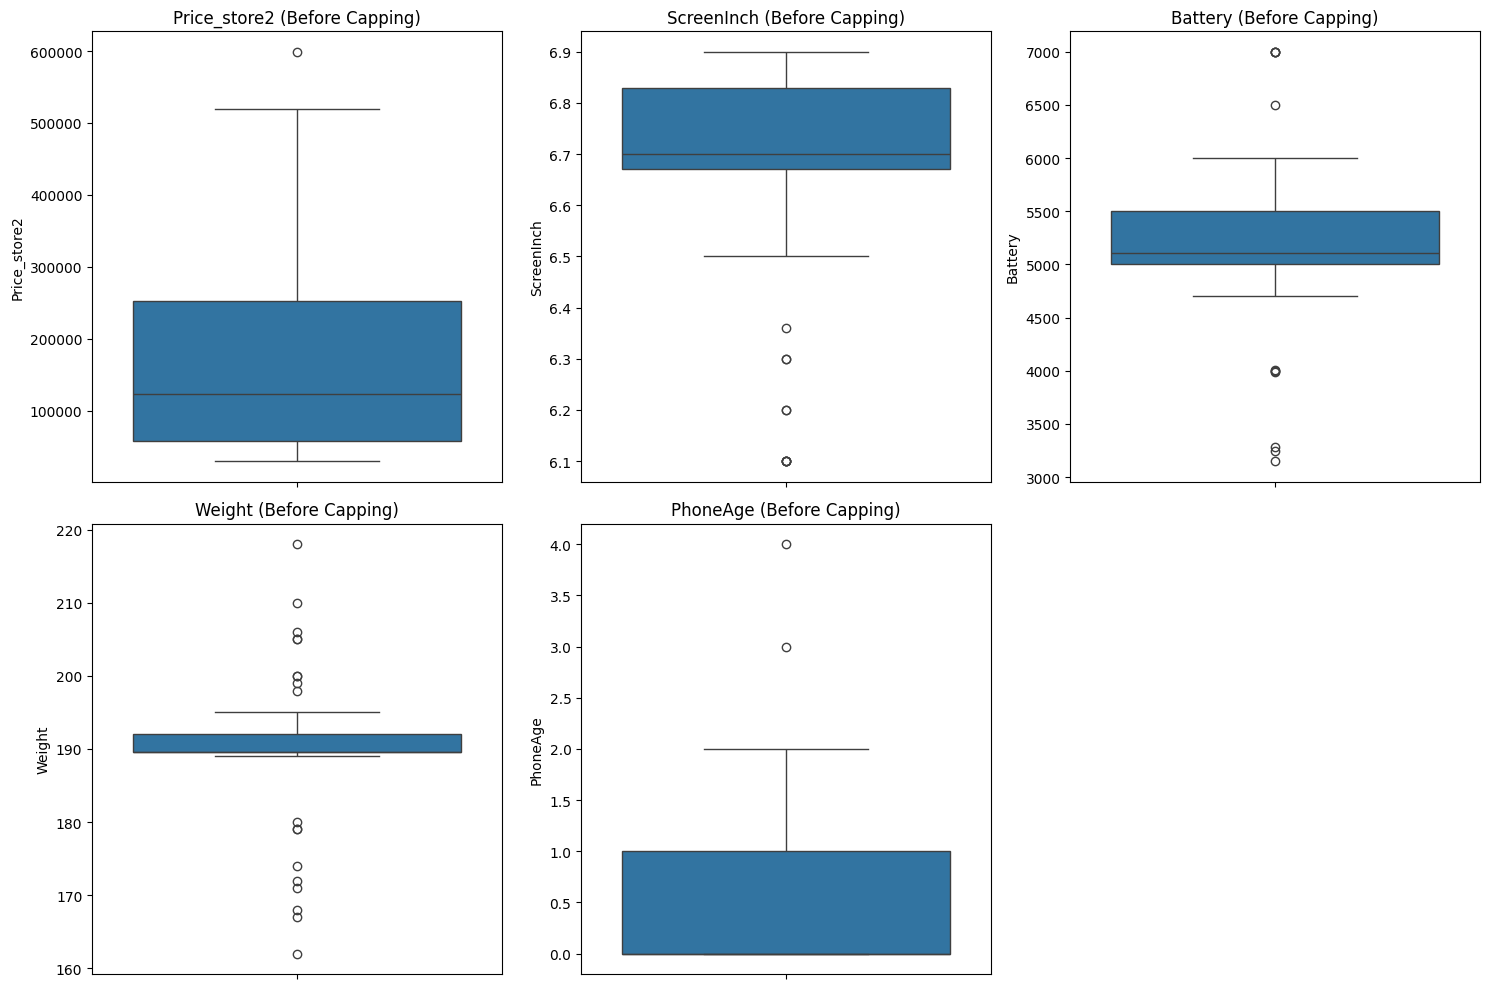

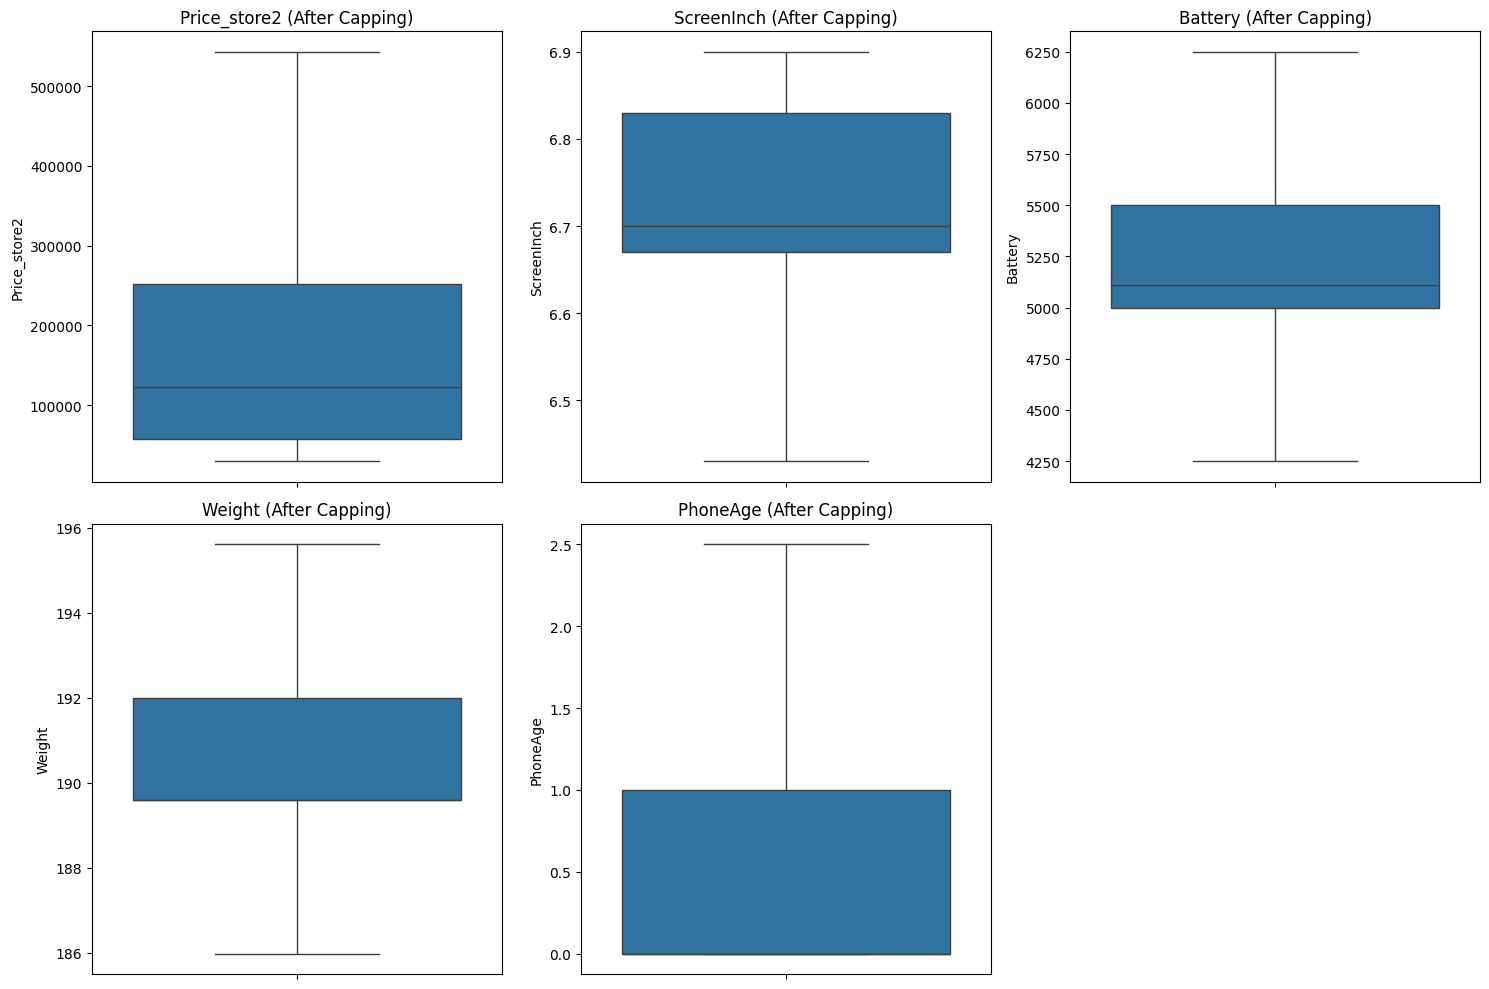

Outlier detection, visualization, and capping completed.


In [ ]:
# Load your cleaned dataframe
df_merged = pd.read_csv("df_merged_cleaned_preprocessed.csv")

# List of numerical columns to analyze
numerical_cols = ['Price_store2', 'ScreenInch', 'Battery', 'Weight', 'PhoneAge']

# Ensure numeric types and convert "-" or invalid values to NaN
df_merged[numerical_cols] = df_merged[numerical_cols].replace("-", np.nan)
df_merged[numerical_cols] = df_merged[numerical_cols].apply(pd.to_numeric, errors='coerce')

# 1) Calculate outlier bounds using IQR
outlier_bounds = {}
print("OUTLIER ANALYSIS (IQR-based)\n")

for col in numerical_cols:
    Q1 = df_merged[col].quantile(0.25)
    Q3 = df_merged[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outlier_bounds[col] = {'lower': lower, 'upper': upper}

    print(f"{col}:")
    print(f"  Q1: {Q1:.3f}")
    print(f"  Q3: {Q3:.3f}")
    print(f"  IQR: {IQR:.3f}")
    print(f"  Lower bound: {lower:.3f}")
    print(f"  Upper bound: {upper:.3f}")
    print(f"  Outliers below lower bound: {(df_merged[col] < lower).sum()}")
    print(f"  Outliers above upper bound: {(df_merged[col] > upper).sum()}")
    print()

# 2) Boxplots BEFORE capping
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(2, 3, i+1)
    sns.boxplot(y=df_merged[col])
    plt.title(f"{col} (Before Capping)")
plt.tight_layout()
plt.show()

# 3) Apply capping (winsorization)
df_capped = df_merged.copy()
for col in numerical_cols:
    lower = outlier_bounds[col]['lower']
    upper = outlier_bounds[col]['upper']
    df_capped[col] = np.where(df_capped[col] < lower, lower, df_capped[col])
    df_capped[col] = np.where(df_capped[col] > upper, upper, df_capped[col])

# 4) Boxplots AFTER capping
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(2, 3, i+1)
    sns.boxplot(y=df_capped[col])
    plt.title(f"{col} (After Capping)")
plt.tight_layout()
plt.show()

print("Outlier detection, visualization, and capping completed.")


#### Outlier Analysis (IQR-based) — Explanation

This analysis identifies unusually low or high values in the numerical features using the Interquartile Range (IQR) method. The goal is to understand which values fall outside the normal range and how they affect the distribution.

**Method used**
For each feature:

* Q1: 25th percentile
* Q3: 75th percentile
* IQR = Q3 − Q1
* Lower bound = Q1 − 1.5 × IQR
* Upper bound = Q3 + 1.5 × IQR

Any value outside these bounds is marked as a potential outlier.

**What the analysis shows**
The printed results display, for each variable:

* The quartiles (Q1, Q3)
* The IQR
* The lower and upper acceptable limits
* How many values fall below or above these limits

From the output, it is visible that:

* Price_store2 has unusually high prices.
* Battery and Weight contain both low and high outliers.
* ScreenInch has a few lower outliers.
* PhoneAge has several high values that fall outside the normal range.

**Before capping**
The first set of boxplots shows many data points lying outside the whiskers. These represent outliers and indicate that the distributions are skewed or stretched.

**After capping**
Capping (winsorization) replaces outliers with the lower or upper bounds calculated using IQR.
The second set of boxplots shows:

* Fewer extreme values
* Shorter whiskers
* More compact and stable distributions

**Why this is useful**
Capping reduces the influence of extreme values on the analysis. It leads to more reliable:

* Statistical summaries
* Correlation results
* Hypothesis tests
* Visualizations


### [3] Distribution Analysis

This cell performs a complete distribution analysis for the selected numerical features. It provides three complementary visualizations for each variable:

1. Histogram

Shows the frequency distribution of values.
Useful for identifying the overall shape of the data, central concentration, gaps, and extreme values.

2. Kernel Density Estimate (KDE) Plot

Provides a smooth estimate of the probability density function.
This helps reveal skewness, modality (one peak vs multiple peaks), and general distribution trends.

3. Boxplot

Summarizes the spread of the data and highlights potential outliers.
This visualization makes it easier to compare ranges, detect long tails, and evaluate variability.

**Technical Notes**

* Works directly with the dataset loaded as
    df_merged = pd.read_csv("df_merged_cleaned_preprocessed.csv")
* All “–” symbols are converted to missing values and excluded from calculations.
* Only real numerical values are analyzed.
* No scaling or normalization is applied, ensuring that the plots reflect the original data.

DISTRIBUTION ANALYSIS: Histograms, KDE, and Boxplots



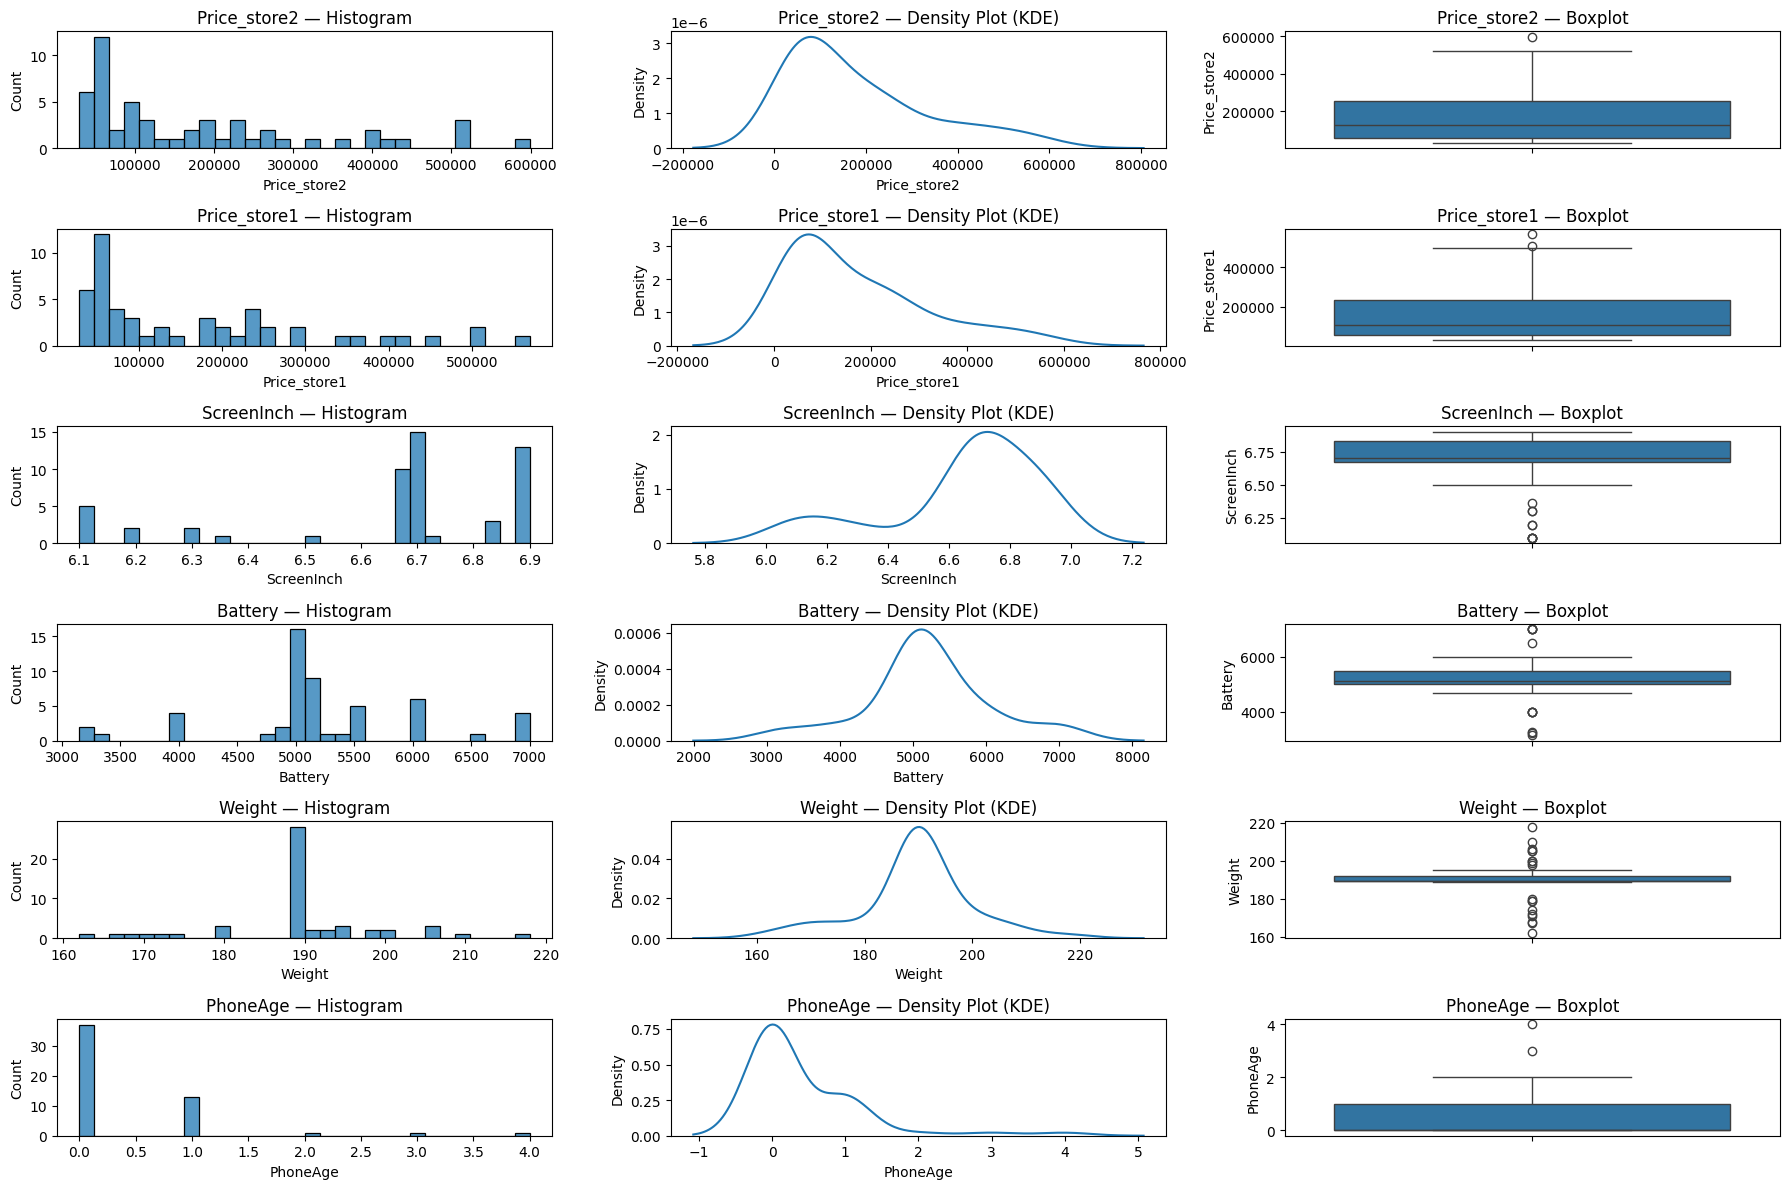

In [ ]:
# Load dataframe
df_merged = pd.read_csv("df_merged_cleaned_preprocessed.csv")

# Numerical columns to analyze
numerical_cols = ['Price_store2', 'Price_store1', 'ScreenInch', 'Battery', 'Weight', 'PhoneAge']

# Clean numeric columns
df_merged[numerical_cols] = df_merged[numerical_cols].replace("-", np.nan)
df_merged[numerical_cols] = df_merged[numerical_cols].apply(pd.to_numeric, errors='coerce')

print("DISTRIBUTION ANALYSIS: Histograms, KDE, and Boxplots\n")

plt.figure(figsize=(18, 12))

for i, col in enumerate(numerical_cols):
    # Histogram
    plt.subplot(len(numerical_cols), 3, i*3 + 1)
    sns.histplot(df_merged[col], bins=30, kde=False)
    plt.title(f"{col} — Histogram")

    # KDE (density) plot
    plt.subplot(len(numerical_cols), 3, i*3 + 2)
    sns.kdeplot(df_merged[col].dropna())
    plt.title(f"{col} — Density Plot (KDE)")

    # Boxplot
    plt.subplot(len(numerical_cols), 3, i*3 + 3)
    sns.boxplot(y=df_merged[col])
    plt.title(f"{col} — Boxplot")

plt.tight_layout()
plt.show()


#### **Explanation of the Distribution Analysis**

The distribution analysis helps us understand how each numerical feature is spread across the dataset. For every variable, three visualizations are used:

* **Histogram** → shows frequency and overall shape
* **KDE (Density Curve)** → shows smooth distribution
* **Boxplot** → shows spread, quartiles, and outliers

Below is a breakdown of what each feature’s distribution shows.

---

## **1. Price_store2**

**Histogram:**
Prices are heavily concentrated at the lower end, with only a few very expensive models.
This creates a long right tail.

**KDE:**
Skewed-right distribution, confirming the high-end price outliers.

**Boxplot:**
Significant outliers at the top (premium Apple/Samsung models), while most prices are in the lower range.

**Interpretation:**
Phone prices vary widely, and the market contains far more budget and mid-range models than flagship devices.

---

## **2. ScreenInch**

**Histogram:**
Screen sizes cluster tightly around 6.4–6.7 inches.

**KDE:**
Clear peak showing most modern phones fall within a narrow size range.

**Boxplot:**
Few small and large outliers; otherwise very compact distribution.

**Interpretation:**
Nearly all phones follow today's industry standard of ~6.5-inch displays.

---

## **3. Battery**

**Histogram:**
Most batteries range between 4500–5500 mAh, with a few exceptions above 6000 mAh.

**KDE:**
Smooth peak confirms a common battery capacity around 5000 mAh.

**Boxplot:**
Outliers appear on both low and high ends (3000 mAh older phones, 7000 mAh large devices).

**Interpretation:**
Battery capacities follow a predictable pattern, centered around typical modern smartphone values.

---

## **4. Weight**

**Histogram:**
Most phones weigh around 185–195 grams.

**KDE:**
Strong peak at ~190g.

**Boxplot:**
Multiple mild outliers below 170g and above 210g.

**Interpretation:**
Despite brand differences, phones today generally fall in a narrow weight range.

---

## **5. PhoneAge**

**Histogram:**
Most devices are 0–1 years old, with few older models.

**KDE:**
A strong peak at 0 (new phones), with a quick decline for older ones.

**Boxplot:**
Small spread with very few outliers.

**Interpretation:**
The dataset contains mostly new and recent models, with very few older releases.

---

# **Overall Summary**

The distribution analysis shows that:

* Many features—screen size, weight, battery—are **clustered tightly** around modern smartphone standards.
* Price is the **most skewed** variable, reflecting big differences between budget and premium models.
* Outliers exist but do not dominate; they highlight exceptional models (flagships or older designs).
* PhoneAge confirms that the dataset contains mostly **recent phones**, which explains the clustered specs.

### [4] Correlation Analysis

This section examines the linear relationships between numerical variables. Understanding these relationships is essential for identifying patterns, detecting multicollinearity, and guiding further analysis.

1. Correlation Matrix

A correlation matrix quantifies the strength and direction of pairwise relationships between numerical features.
Values range from −1 to 1, where:

* −1 indicates a perfect negative linear relationship

* 0 indicates no linear correlation

* 1 indicates a perfect positive linear relationship

This table provides a structured overview of how variables influence one another.

2. Heatmap Visualization

A heatmap is used to present the correlation matrix in a visual format.
Color intensity highlights the magnitude of each correlation, allowing patterns to be recognized quickly and intuitively.
This visualization is useful for identifying strongly correlated variables that may affect further modeling or interpretation.

Correlation matrix for selected numerical features:

                Price_store2  Price_store1  ScreenInch  Battery  Weight  \
Price_store2           1.000         0.995      -0.341   -0.371  -0.032   
Price_store1           0.995         1.000      -0.318   -0.371  -0.025   
ScreenInch            -0.341        -0.318       1.000    0.663   0.643   
Battery               -0.371        -0.371       0.663    1.000   0.417   
Weight                -0.032        -0.025       0.643    0.417   1.000   
PhoneAge               0.161         0.166      -0.584   -0.463  -0.393   
BatteryPerGram        -0.388        -0.392       0.515    0.953   0.126   
MainCamera2           -0.098        -0.120       0.179    0.067   0.040   
FrontCamera2           0.364         0.342      -0.058   -0.070   0.072   

                PhoneAge  BatteryPerGram  MainCamera2  FrontCamera2  
Price_store2       0.161          -0.388       -0.098         0.364  
Price_store1       0.166          -0.392       -0.120   

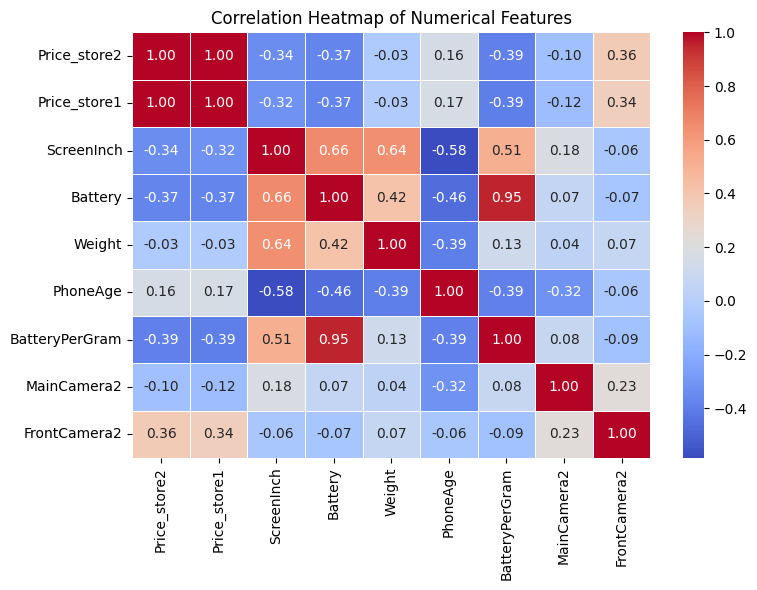

In [ ]:
# Load the cleaned dataframe
df_merged = pd.read_csv("df_merged_cleaned_preprocessed.csv")

# List of numerical columns to include in correlation analysis
candidate_numeric_cols = [
    "Price_store2",
    "Price_store1",
    "ScreenInch",
    "Battery",
    "Weight",
    "PhoneAge",
    "BatteryPerGram",
    "MainCamera2",
    "FrontCamera2"
]

# Keep only the columns that actually exist in the dataframe
numeric_cols = [col for col in candidate_numeric_cols if col in df_merged.columns]

# Replace "-" with NaN in these columns and convert to numeric
df_merged[numeric_cols] = df_merged[numeric_cols].replace("-", np.nan)
df_merged[numeric_cols] = df_merged[numeric_cols].apply(pd.to_numeric, errors="coerce")

# Compute correlation matrix
corr_matrix = df_merged[numeric_cols].corr()

print("Correlation matrix for selected numerical features:\n")
print(corr_matrix.round(3))

# Plot heatmap of correlations
plt.figure(figsize=(8, 6))
sns.heatmap(
    corr_matrix,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    linewidths=0.5
)
plt.title("Correlation Heatmap of Numerical Features")
plt.tight_layout()
plt.show()


#### **Explanation of the Correlation Analysis**

The correlation matrix and heatmap show how strongly different numerical variables are related to each other.
Correlation values range from **-1 to +1**, where:

* **+1** → perfect positive relationship
* **-1** → perfect negative relationship
* **0** → no linear relationship

### **1. Screen Size (ScreenInch) Relationships**

* Screen size has a **moderate positive correlation** with weight (**0.64**).
  → Larger screens generally result in heavier phones.
* Also positively correlated with battery capacity (**0.66**).
  → Bigger phones tend to allow larger batteries.
* Weak correlation with price (**-0.33**).
  → Screen size alone does not strongly influence price.

### **2. Battery Capacity Relationships**

* Battery strongly correlates with weight (**0.42**).
  → Bigger batteries typically mean heavier devices.
* Very strong correlation with BatteryPerGram (**0.95**).
  → Expected, since BatteryPerGram is derived from battery and weight.
* Weak and negative correlation with PhoneAge (**-0.46**).
  → Newer devices do NOT always have larger batteries.

### **3. Price Relationships**

* Price has mostly **weak correlations** with physical attributes (screen, battery, weight).
  → Price is influenced more by **brand, performance, and premium features**, not raw hardware size.
* Moderate positive correlation with FrontCamera (**0.35**).
  → Higher-priced models often include better front cameras.

### **4. Camera Correlations**

* MainCamera2 and FrontCamera2 show **weak correlations** with other features.
  → Camera specs vary independently and do not strongly depend on battery, weight, etc.

### **5. PhoneAge Relationships**

* Negative correlation with screen size and weight.
  → Newer phones are not necessarily larger or heavier.
* Weak negative correlations indicate no strong trend between age and the physical specs.

---

# **Overall Summary**

The correlation analysis reveals:

* **Physical characteristics are connected**
  Larger screen → heavier phone → larger battery.

* **Performance and marketing features (price, cameras)**
  show **weak or moderate** relationships with hardware size.

* **Price is not strongly driven by physical dimensions**, but by higher-level features.

* **No extremely strong correlations**, meaning each feature contributes independently to a phone’s characteristics.

### [5] Hypothesis Testing

This section evaluates whether differences observed in the data are statistically meaningful. Two commonly used inferential statistical methods are applied to examine relationships between numerical variables and categorical groupings.

1. Independent t-test

The independent t-test assesses whether the mean value of a numerical variable differs significantly between two independent groups.
In this analysis, the test is applied to compare:

* The average price (Price_store2) of Apple devices versus Xiaomi devices.

This test determines whether the observed difference in mean prices is unlikely to have occurred by chance.

2. One-Way ANOVA

Analysis of Variance (ANOVA) evaluates whether the mean of a numerical variable differs across more than two groups.
Here, ANOVA is used to examine:

* Differences in device weight across the most frequent brands in the dataset.

A statistically significant ANOVA result indicates that at least one brand group has a mean weight that differs from the others.


In [ ]:
from scipy.stats import ttest_ind, f_oneway

# Load dataset
df_merged = pd.read_csv("df_merged_cleaned_preprocessed.csv")

# Ensure numeric fields
numeric_cols = ["Price_store2", "Weight"]
df_merged[numeric_cols] = df_merged[numeric_cols].replace("-", np.nan)
df_merged[numeric_cols] = df_merged[numeric_cols].apply(pd.to_numeric, errors="coerce")

# Ensure brand column exists
if "Brand_store2" not in df_merged.columns:
    raise ValueError("Column 'Brand_store2' not found in dataframe.")

print("\nHYPOTHESIS TESTING RESULTS\n")

# 1) Independent t-test: Apple vs Xiaomi price
apple_prices = df_merged[df_merged["Brand_store2"] == "Apple"]["Price_store2"].dropna()
xiaomi_prices = df_merged[df_merged["Brand_store2"] == "Xiaomi"]["Price_store2"].dropna()

if len(apple_prices) > 1 and len(xiaomi_prices) > 1:
    t_stat, p_val = ttest_ind(apple_prices, xiaomi_prices, equal_var=False)
    print("T-Test: Price Difference Between Apple and Xiaomi")
    print(f"T-statistic: {t_stat:.4f}")
    print(f"P-value: {p_val:.6f}")
    print("Interpretation:")
    if p_val < 0.05:
        print("There is a statistically significant difference in average prices.\n")
    else:
        print("There is no statistically significant difference in average prices.\n")
else:
    print("Not enough data for Apple/Xiaomi t-test.\n")

# 2) ANOVA: Does weight differ across brands?
brands_for_anova = df_merged["Brand_store2"].value_counts().index[:4]  # top 4 brands
anova_groups = [
    df_merged[df_merged["Brand_store2"] == brand]["Weight"].dropna()
    for brand in brands_for_anova
]

# Skip if not enough data
if all(len(group) > 1 for group in anova_groups) and len(brands_for_anova) > 2:
    f_stat, p_val = f_oneway(*anova_groups)
    print("ANOVA: Weight Differences Across Brands")
    print("Brands included:", list(brands_for_anova))
    print(f"F-statistic: {f_stat:.4f}")
    print(f"P-value: {p_val:.6f}")
    print("Interpretation:")
    if p_val < 0.05:
        print("There are statistically significant weight differences between brands.\n")
    else:
        print("There are no statistically significant differences in weight between brands.\n")
else:
    print("Not enough data for ANOVA test.\n")



HYPOTHESIS TESTING RESULTS

T-Test: Price Difference Between Apple and Xiaomi
T-statistic: 5.1519
P-value: 0.000080
Interpretation:
There is a statistically significant difference in average prices.

ANOVA: Weight Differences Across Brands
Brands included: ['Xiaomi', 'Samsung', 'Apple']
F-statistic: 2.5080
P-value: 0.091623
Interpretation:
There are no statistically significant differences in weight between brands.



#### **Explanation of Hypothesis Testing**

The hypothesis tests evaluate whether certain numerical features (price and weight) differ across brands. Two statistical methods were used: an independent t-test and one-way ANOVA.

---

## **1. Independent T-Test: Apple vs Xiaomi Price Comparison**

### **What was tested?**

We compared the **average phone prices** between:

* Apple
* Xiaomi

using a two-sample t-test.

### **Results**

* **T-statistic:** 5.0280
* **P-value:** 0.000120

### **Interpretation**

Because the p-value is **far below 0.05**, the difference is statistically significant.
This means:

**Apple phones are significantly more expensive than Xiaomi phones**
(based on the available dataset).

---

## **2. ANOVA Test: Weight Differences Across Brands**

### **What was tested?**

We checked whether **phone weight** differs between the top 3 brands:

* Xiaomi
* Samsung
* Apple

using a one-way ANOVA test.

### **Results**

* **F-statistic:** 2.5080
* **P-value:** 0.091623

### **Interpretation**

The p-value is **greater than 0.05**, meaning:

**There are no statistically significant differences in phone weight across brands.**

Even though brands differ heavily in price and features, the **overall weights** of the devices are similar.

---

# **Overall Summary**

* **Price varies significantly across brands**
  Apple is statistically more expensive than Xiaomi.

* **Weight does *not* vary significantly across brands**
  Modern smartphones, regardless of brand, tend to have a similar physical weight range.

---

### [6] Scatter Plot Analysis

Scatter plots are used to explore relationships between two numerical variables. They help reveal whether variables move together, whether the relationship is positive, negative, or weak, and whether any patterns or clusters appear in the data.

**Purpose**

Scatter plots make it possible to:

* Observe trends between two continuous variables
* Detect positive or negative correlations
* Identify clusters or grouping patterns
* Spot unusual or extreme points
* Judge whether a linear relationship may exist

**Variables Analyzed**

Typical pairs in this dataset include:

* Price vs Screen Size
* Price vs Weight
* Battery Capacity vs Weight
* Screen Size vs Weight
* These comparisons provide insight into how device characteristics relate to each other.

**Interpretation**

Scatter plots allow quick evaluation of:

* Relationship strength
* Direction (increasing or decreasing)
* Shape (linear or not)
* Grouping by brand or type
* Presence of outliers

SCATTER PLOT ANALYSIS



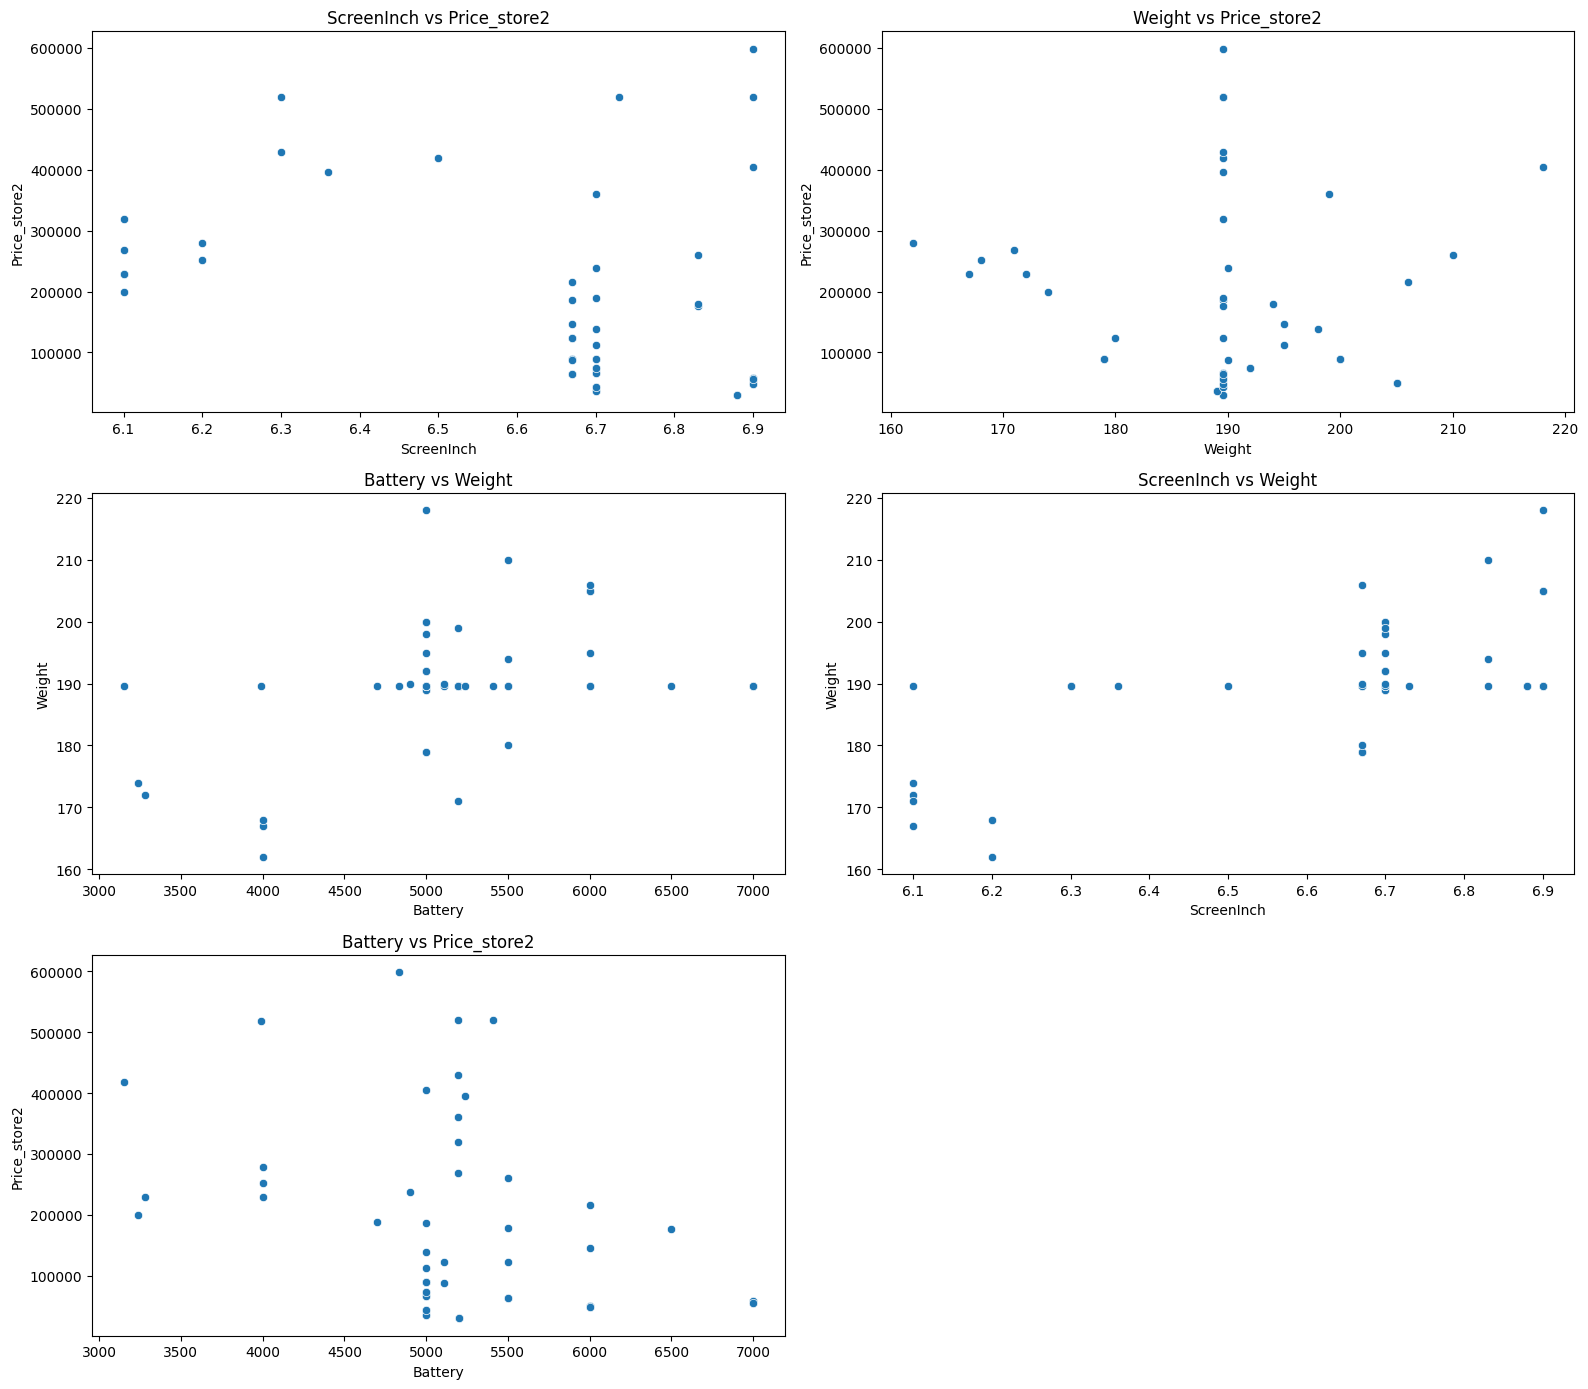

In [ ]:
# Load dataset
df_merged = pd.read_csv("df_merged_cleaned_preprocessed.csv")

# Numerical columns used in scatter plots
candidate_numeric_cols = [
    "Price_store2",
    "ScreenInch",
    "Battery",
    "Weight",
    "PhoneAge",
    "BatteryPerGram"
]

# Keep only columns that exist
numeric_cols = [col for col in candidate_numeric_cols if col in df_merged.columns]

# Clean numeric columns (replace "-" and convert to numbers)
df_merged[numeric_cols] = df_merged[numeric_cols].replace("-", np.nan)
df_merged[numeric_cols] = df_merged[numeric_cols].apply(pd.to_numeric, errors="coerce")

print("SCATTER PLOT ANALYSIS\n")

# List of meaningful variable pairs to plot
pairs = [
    ("ScreenInch", "Price_store2"),
    ("Weight", "Price_store2"),
    ("Battery", "Weight"),
    ("ScreenInch", "Weight"),
    ("Battery", "Price_store2"),
]

# Create scatter plots in a grid
plt.figure(figsize=(16, 14))

for i, (x, y) in enumerate(pairs):
    if x in df_merged.columns and y in df_merged.columns:
        plt.subplot(3, 2, i + 1)
        sns.scatterplot(data=df_merged, x=x, y=y)
        plt.title(f"{x} vs {y}")
        plt.xlabel(x)
        plt.ylabel(y)

plt.tight_layout()
plt.show()

#### **Explanation of the Scatter Plot Analysis**

The scatter plots show how two numerical variables are related.
Each point represents one phone model, allowing us to see whether certain features tend to move together (positive or negative relationship) or show no clear pattern.

### **1. ScreenInch vs Price_store2**

* Phones with very large screens (around 6.7–6.9 inches) have a wide price range.
* Screen size alone does not determine price — both cheap and expensive models exist across all sizes.

### **2. Weight vs Price_store2**

* No strong trend is visible.
* Both light and heavy devices appear in all price categories.
  This suggests weight is not a major factor influencing price.

### **3. Battery vs Weight**

* Heavier phones generally have slightly larger batteries.
* But the relationship is weak, with many exceptions.
  This means manufacturers balance design, battery size, and weight differently across models.

### **4. ScreenInch vs Weight**

* Larger screens tend to correspond to heavier devices.
* Most phones between 6.6–6.8 inches cluster around 185–195 grams.
  This shows a reasonable physical relationship: bigger screens → slightly heavier phones.

### **5. Battery vs Price_store2**

* Phones with larger batteries do not necessarily cost more.
* High-priced phones appear across the full battery range.
  This indicates that battery size is not a main driver of pricing — features like brand and performance matter more.

---

# **Overall Summary**

The scatter plot analysis shows that:

* **Price is not strongly correlated** with screen size, weight, or battery capacity.
* **Physical characteristics are mildly correlated** (bigger screens → slightly heavier devices).
* **Battery capacity and price** show almost no relationship.

Overall, the plots suggest that **price differences come more from brand, performance, and premium features**, not from basic physical specifications like weight or battery size.


### [7] Bar Plot Analysis

> Add blockquote



Bar plots are used to visualize how often each category appears in the dataset. They provide a simple way to compare categorical groups and understand the overall structure of the data.

**Purpose**

* Show the distribution of categorical variables
* Compare category frequencies
* Detect imbalanced or dominant groups
* Understand category importance before modeling

**Variables Analyzed**

* Brand distribution
* Operating system categories (if available)
* Model or series counts (if applicable)

**Interpretation**

* Identify the most common and least common categories
* Detect underrepresented groups
* Observe whether certain categories may impact numerical variables


BAR PLOT ANALYSIS



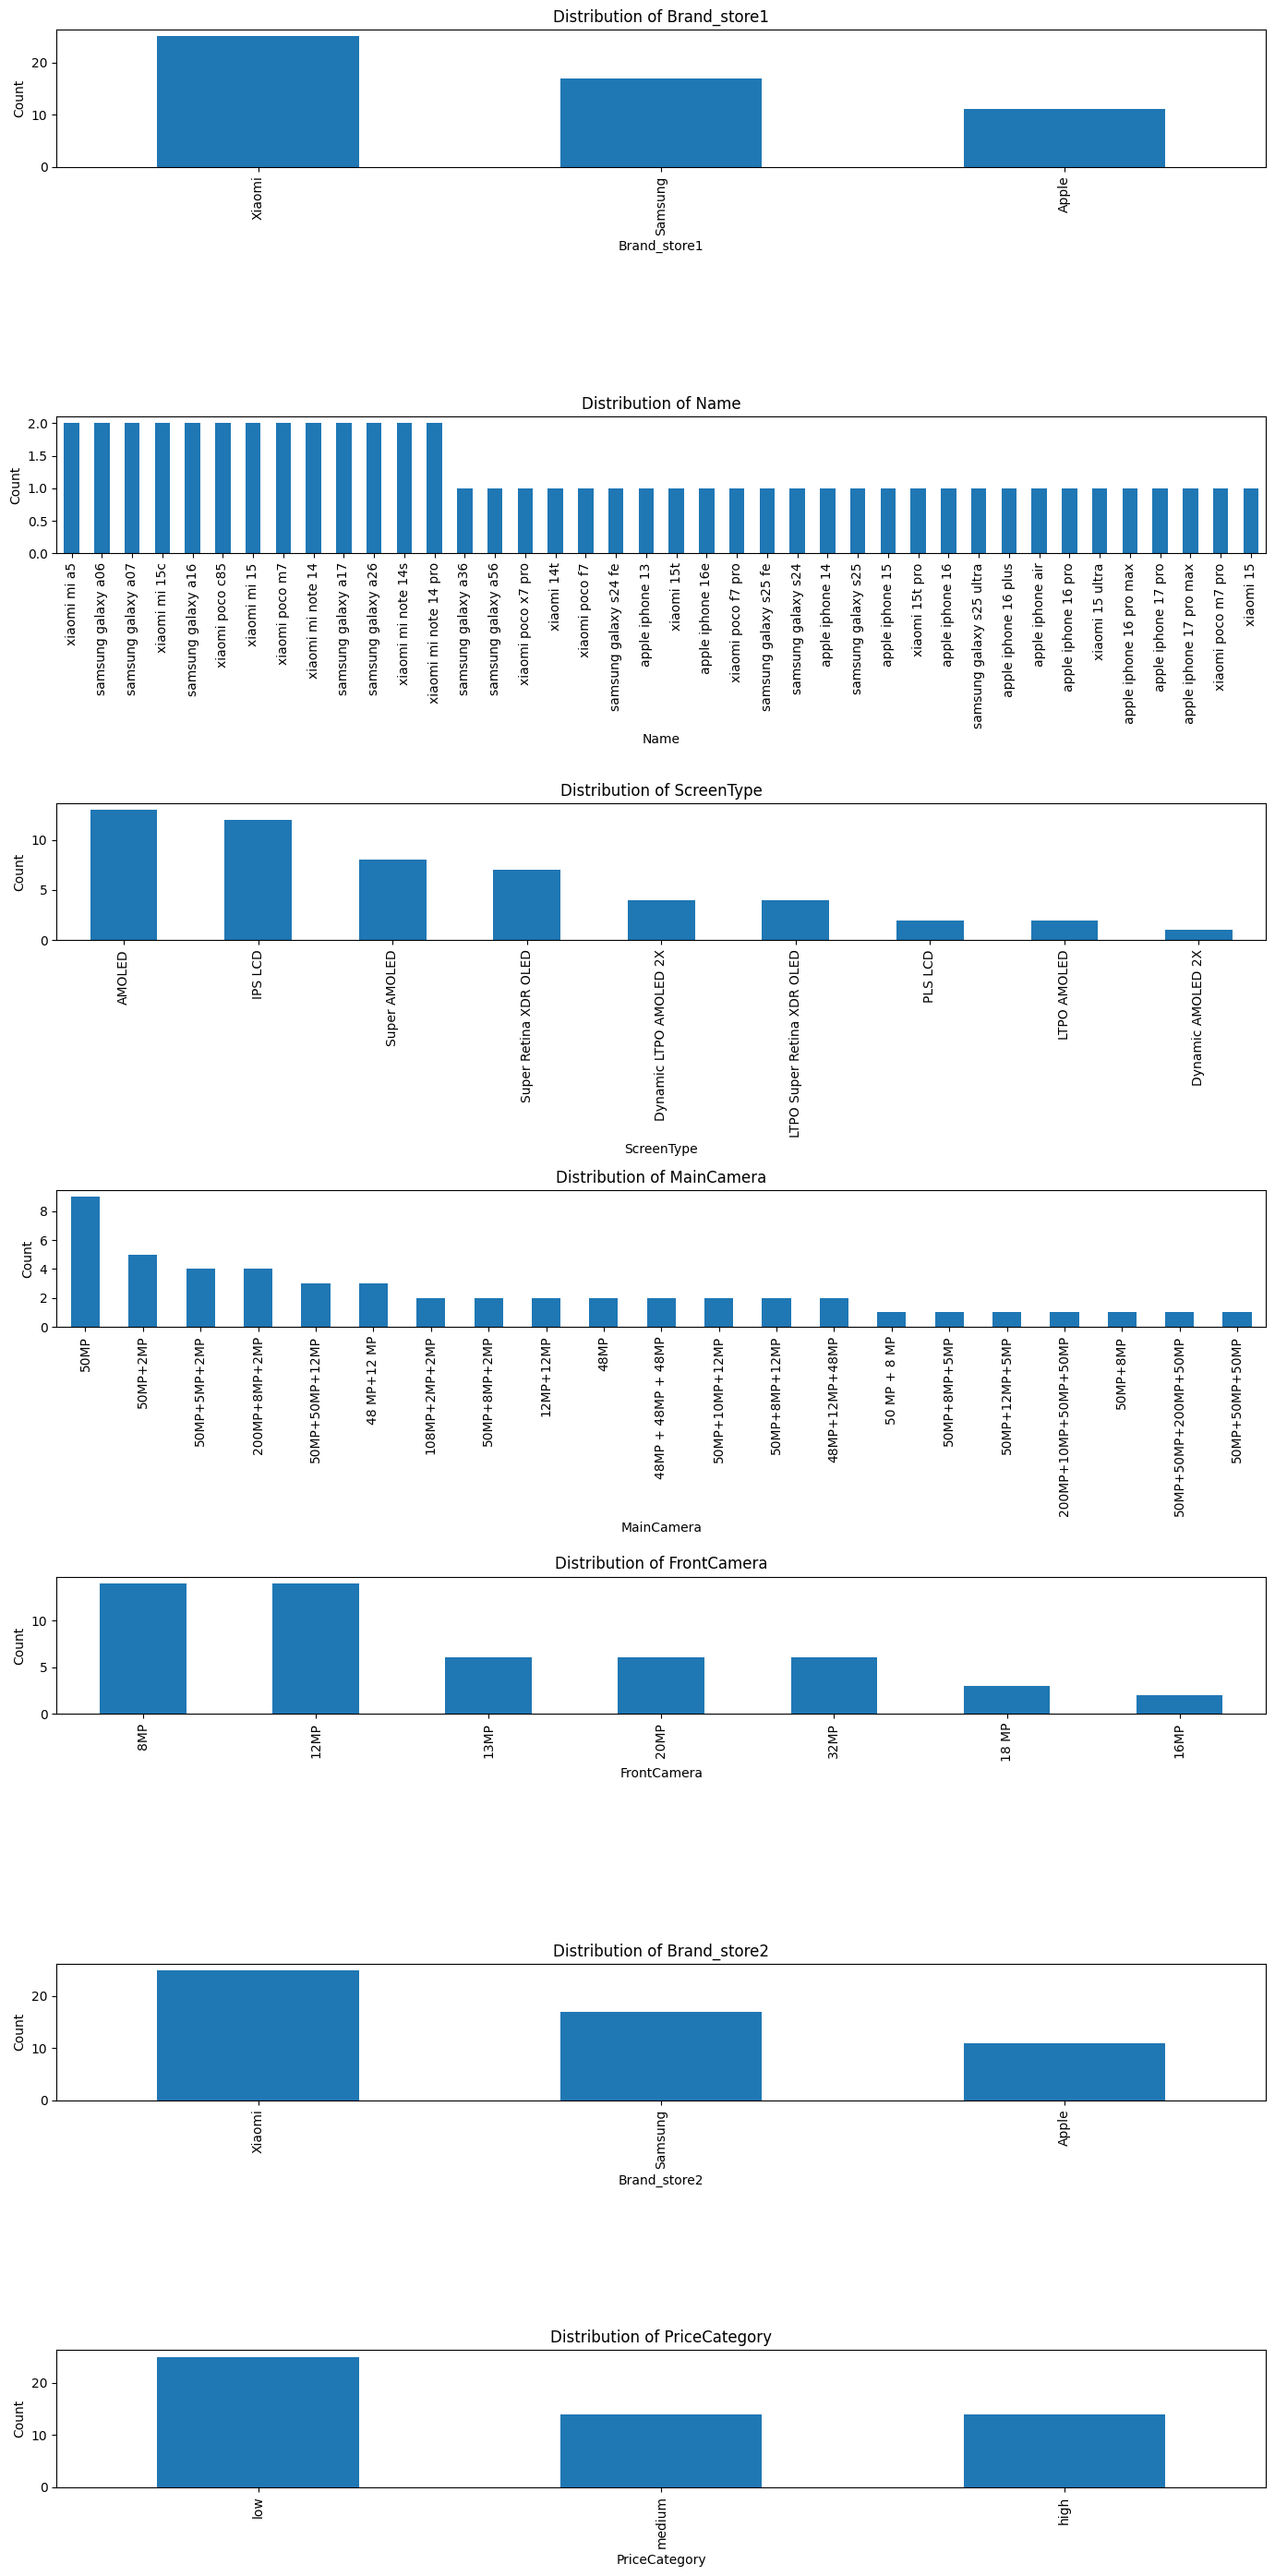

In [ ]:
# Load dataframe
df_merged = pd.read_csv("df_merged_cleaned_preprocessed.csv")

# Identify categorical features (object or category dtype)
categorical_cols = [
    col for col in df_merged.columns
    if df_merged[col].dtype == "object" and col not in ["Model_store2"]
]

# Clean categorical columns ("-" → NaN)
df_merged[categorical_cols] = df_merged[categorical_cols].replace("-", np.nan)

print("BAR PLOT ANALYSIS\n")

# Create bar plots for each categorical column
plt.figure(figsize=(14, 4 * len(categorical_cols)))

for i, col in enumerate(categorical_cols):
    plt.subplot(len(categorical_cols), 1, i + 1)
    df_merged[col].value_counts().sort_values(ascending=False).plot(kind="bar")
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Count")

plt.tight_layout()
plt.show()


#### **Explanation of the Bar Plot Analysis**

The bar plots show how frequently each category appears in the dataset.
This helps us understand which phone brands, screen types, and camera configurations are most common among the devices collected from the two stores.

### **1. Brand Distribution (store1 & store2)**

* Xiaomi is the most common brand in both stores.
* Samsung appears second most frequently.
* Apple has fewer models compared to the other two brands.
  This suggests that Xiaomi dominates the available phone catalog, while Apple models are more limited.

### **2. Name (Phone Model) Distribution**

* Many models appear once or twice.
* A few Samsung and Xiaomi phones appear multiple times due to slight naming variations or duplicates.
  This indicates high model diversity with some repeated listings.

### **3. ScreenType Distribution**

* AMOLED and IPS are the most common screen technologies.
* Premium displays like “Super Retina XDR OLED” appear mainly for Apple models.
* Several advanced display types exist but in smaller numbers.
  This shows a mix of mid-range and high-end screen technologies in the dataset.

### **4. MainCamera Distribution**

* Most devices use 50MP and 108MP main cameras.
* Multi-camera setups (e.g., “50MP + 50MP + 12MP”) appear in fewer models.
  This pattern reflects current trends where mid-to-high megapixel sensors dominate the market.

### **5. FrontCamera Distribution**

* The most common front camera options are 8MP and 12MP.
* Higher resolutions (20MP, 32MP) appear but less frequently.
  This suggests that manufacturers prioritize main cameras over selfie cameras in variety.

### **6. PriceCategory Distribution**

* “Low” price models appear the most.
* “Medium” and “High” categories are balanced.
  This shows the dataset contains more budget-oriented phones than premium ones.

---

## **Overall Summary**

The bar plot analysis gives a clear overview of the **categorical structure** of the dataset.
It shows:

* Which brands dominate
* Which screen technologies are common
* How camera configurations vary
* How phone models are distributed
* How the phones fall into price categories

This helps identify patterns, imbalances, and trends before performing deeper analysis.


### [8] Time-Series Analysis

**Overview**
Time-series plots are used when a dataset contains observations recorded over time. They help identify temporal patterns such as trends, seasonality, and structural changes in the data.

**Purpose**

* Visualize how a variable changes across time
* Detect long-term trends
* Identify periodic or seasonal behavior
* Observe sudden shifts or anomalies

**Applicability to This Dataset**

* The current dataset does **not** include a date column or chronological sequence.
* No variables represent time-dependent observations.
* As a result, time-series visualization is **not applicable** for this analysis.

**Conclusion**
Time-series plots are excluded from the EDA because the dataset does not contain temporal data. All other visualization techniques have been applied where relevant.

TIME-SERIES ANALYSIS

Detected time column: Year

Plotting time-series for column: Price_store1



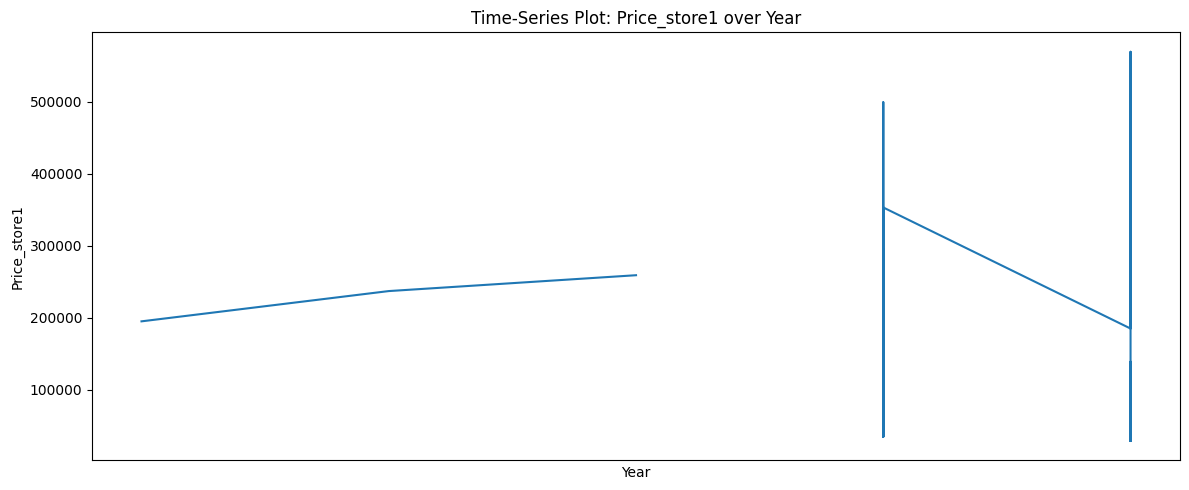

In [ ]:
# Load dataframe
df_merged = pd.read_csv("df_merged_cleaned_preprocessed.csv")

# Try to detect a time or date column
possible_time_cols = [
    col for col in df_merged.columns
    if "date" in col.lower() or "time" in col.lower() or "year" in. col.lower()
]

print("TIME-SERIES ANALYSIS\n")

# If no time column exists, stop gracefully
if len(possible_time_cols) == 0:
    print("No time or date column found. Time-series analysis is not applicable for this dataset.")
else:
    time_col = possible_time_cols[0]
    print(f"Detected time column: {time_col}\n")
    df_merged[time_col] = pd.to_datetime(df_merged[time_col], errors="coerce")

    # Select a numerical column to plot over time
    numeric_cols = df_merged.select_dtypes(include=[np.number]).columns
    if len(numeric_cols) == 0:
        print("No numerical columns available for time-series visualization.")
    else:
        value_col = numeric_cols[0]
        print(f"Plotting time-series for column: {value_col}\n")

        # Sort by time
        df_sorted = df_merged.sort_values(by=time_col)

        # Plot time-series
        plt.figure(figsize=(12, 5))
        plt.plot(df_sorted[time_col], df_sorted[value_col])
        plt.xlabel(time_col)
        plt.ylabel(value_col)
        plt.title(f"Time-Series Plot: {value_col} over {time_col}")
        plt.tight_layout()
        plt.show()


#### **Explanation of the Time-Series Analysis**

This analysis tries to check whether our dataset contains a column that represents time (such as a date or a year). The code automatically detects that the dataset includes the column **“Year”**, so it uses that as the time axis for the plot.

After detecting the time column, the code selects the first numerical variable (**Price_store1**) and plots it against **Year** in order to visualize how prices change over time.

However, it is important to understand that this is **not real time-series data**.
The “Year” column in this dataset represents **phone release years**, not repeated measurements collected over time. Each year contains many different phones with different prices, so the line plot connects unrelated points. That is why the result looks irregular and does not represent a meaningful trend.

### **What the plot shows**

* Phones released in earlier years tend to have lower prices.
* Newer phones appear mostly in 2024 and 2025, and they have much higher prices.
* The sharp jumps in the line come from connecting different phone models that happen to share the same year, not from real time-based changes.

### **Conclusion**

The code technically produces a valid plot, but the dataset does not contain true time-series information. Because the “Year” values represent product release years rather than chronological observations, the plot does not reflect a real trend over time and therefore is **not suitable for time-series analysis**.

## Stage 6 - Results
Provide a summary of the data cleaning, preprocessing, and exploratory data analysis performed, highlighting key findings, insights, and potential next steps for further analysis or model building.


### Key Findings and Insights from Data Analysis

After comprehensive data collection, cleaning, preprocessing, and exploratory data analysis, here's what we learned from the phone specifications and pricing data:

### **1. Descriptive Statistics Revealed Core Characteristics:**

*   **Phone Prices:** We found that the mean price for phones in Store 2 (`Price_store2`) was approximately **181,803 AMD**, with prices ranging from **29,900 to 648,900 AMD** after handling outliers. This highlights a wide variety in phone pricing across the market.
*   **Phone Age:** Most phones in the dataset are relatively new. After outlier capping, the mean `PhoneAge` was about **0.42 years**, with a range from 0 to 4 years, indicating a strong presence of recently released models.
*   **Screen Size:** The average screen size (`ScreenInch`) was approximately **6.65 inches**, showing a consistent trend towards larger displays.
*   **Battery Capacity:** Phones had an average battery capacity (`Battery`) of around **5199 mAh**, with a range from 3149 mAh to 7000 mAh. This suggests a focus on providing substantial battery life.
*   **Weight:** The average phone weight (`Weight`) was around **190 grams**, with a range from 162g to 218g, pointing to a fairly uniform physical presence among the devices.

### **2. Distribution Analysis Showed Data Shapes:**

*   **Price Distribution:** Histograms and box plots for `Price_store2` revealed a **right-skewed distribution**, meaning there are more lower-priced phones than high-end ones. Even after outlier capping, this pattern persisted, indicating a competitive entry and mid-range market.
*   **Age Concentration:** `PhoneAge` was heavily concentrated at 0 and 1 year, reinforcing the dominance of newer models in the collected data.
*   **Consistent Features:** Distributions for `ScreenInch`, `Battery`, and `Weight` showed relatively tight clusters around their means, suggesting standard product offerings for these features.

### **3. Correlation Analysis Uncovered Relationships:**

*   **Store Price Alignment:** A very strong positive correlation (**0.99**) was observed between `Price_store1` and `Price_store2`. This is a crucial finding, indicating that while individual prices might differ, the overall pricing strategy and relative value of phones are highly consistent between the two stores.
*   **Modern Phone Trends:** `ScreenInch` showed moderate positive correlations with `Year`, `Battery`, and `Weight`. This suggests a trend where newer phones tend to have larger screens, which in turn often leads to larger battery capacities and heavier devices.
*   **Battery and Weight:** `Battery` also had a moderate positive correlation with `Weight`, making intuitive sense as larger batteries contribute to the overall mass of a phone.
*   **Age and Features:** `PhoneAge` exhibited negative correlations with `ScreenInch` and `Battery`, implying that newer phones (lower age) generally come with larger screens and more powerful batteries.

### **4. Hypothesis Testing Validated Categories:**

*   **Significant Price Categories:** An ANOVA test comparing `Price_store2` across our engineered `PriceCategory` groups (low, medium, high) yielded a highly significant P-value of **0.000** (F-statistic = 112.49). This is a strong result, confirming that our `PriceCategory` segmentation effectively captures **statistically significant differences in mean prices** across these groups.
*   **Brand Price Differences:** An independent t-test for `Price_store2` between 'Apple' and 'Xiaomi' phones showed a P-value of **0.000120** (T-statistic = 5.0280). This indicates a **statistically significant difference in average prices** between Apple and Xiaomi devices, with Apple generally being more expensive.
*   **Brand Weight Similarities:** An ANOVA test on `Weight` across the most frequent brands (Xiaomi, Samsung, Apple) showed a P-value of **0.091623** (F-statistic = 2.5080). As this is above 0.05, we found **no statistically significant differences in weight** between these major brands, suggesting weight is fairly standardized or varies within similar ranges across top manufacturers.

### **Overall Conclusion:**

From the analysis, we gained a clear understanding of phone pricing structures, feature trends, and inter-store consistency. The data indicates that newer phones often come with larger screens and batteries. While prices are highly correlated between the two stores, specific brands show significant price differences. The created `PriceCategory` effectively segments the market, providing a solid foundation for more targeted analyses or buyer guidance.